## 分析前300百名标准差最大的渠道

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('21 标准差最大的300个渠道单日开户数（标准差大于9）.csv',encoding='gbk')

In [4]:
# 使用strip()函数去除所有单元格前后的空格
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [6]:
df.columns

Index(['   ', 'CREATEDATE', 'CHANNEL_CODE', 'NUM_ACCOUNTS'], dtype='object')

In [7]:
grouped_data = df.groupby('CHANNEL_CODE')

In [ ]:
df['CREATEDATE'] = pd.to_datetime(df['CREATEDATE'])

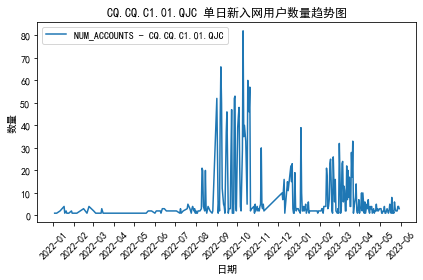

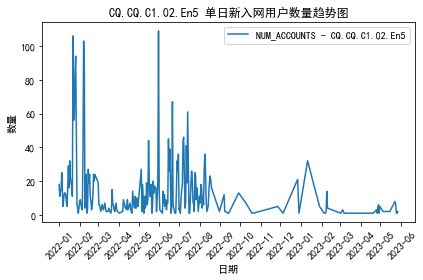

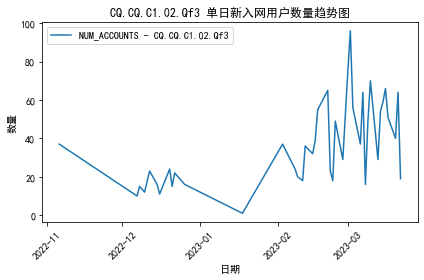

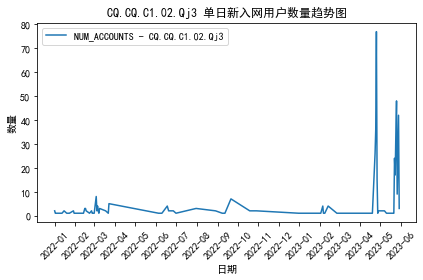

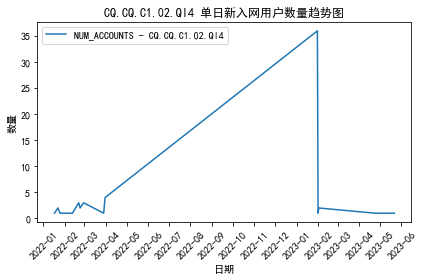

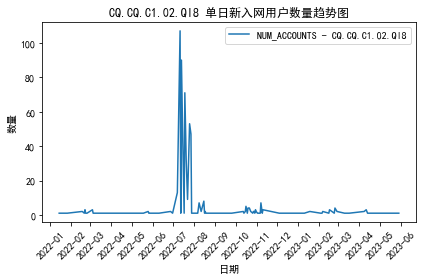

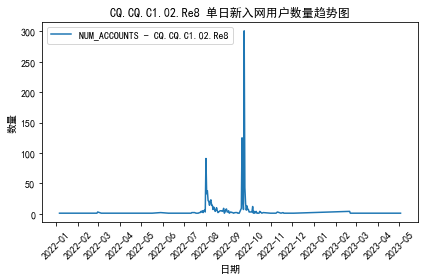

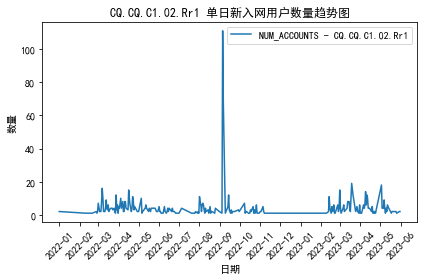

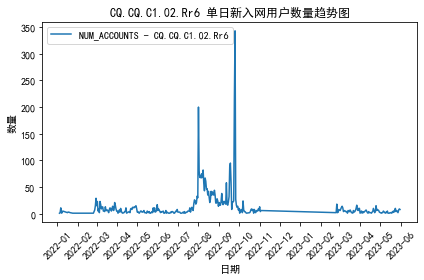

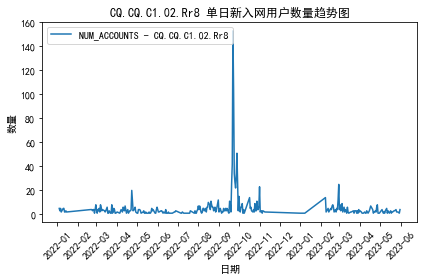

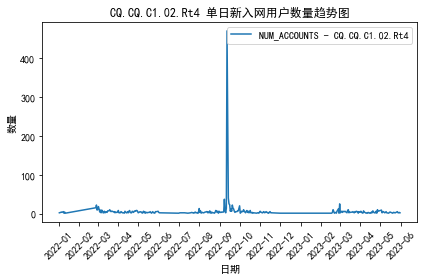

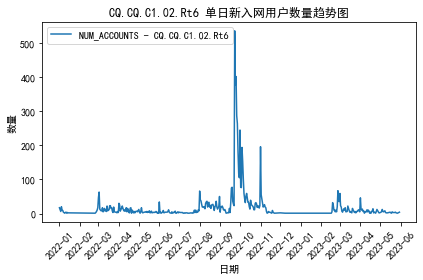

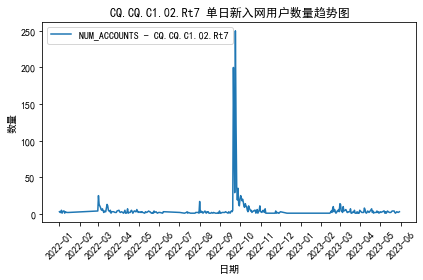

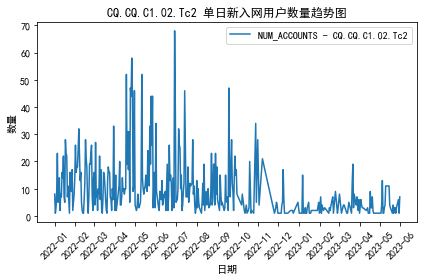

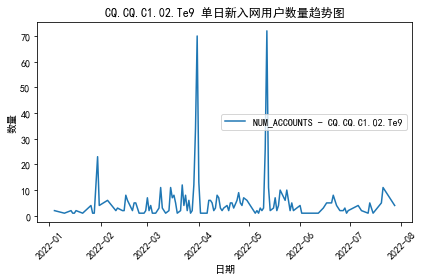

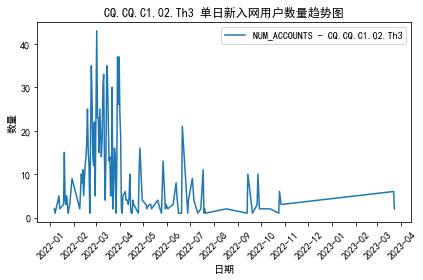

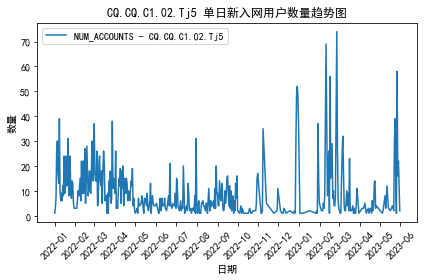

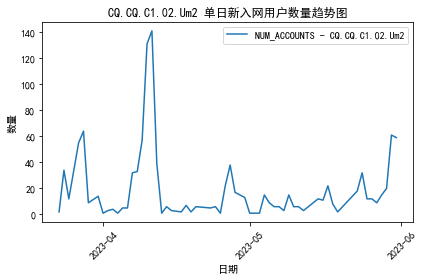

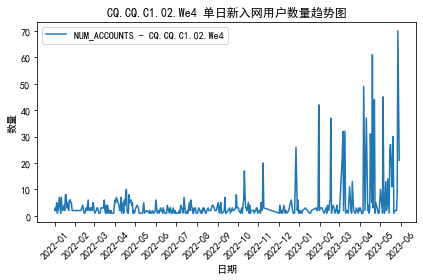

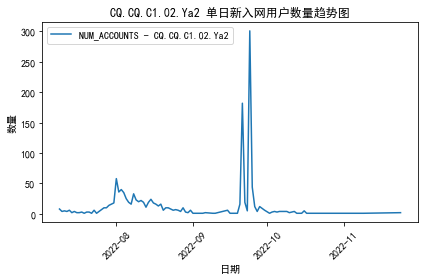

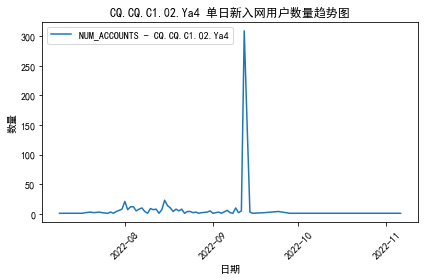

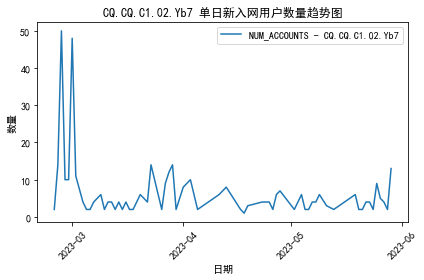

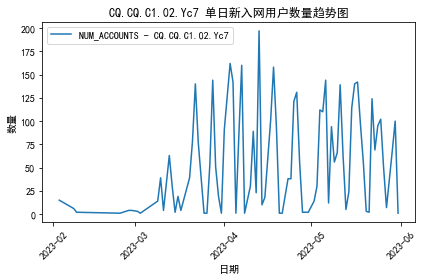

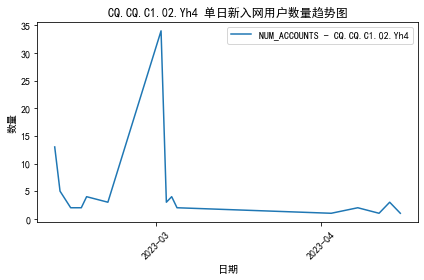

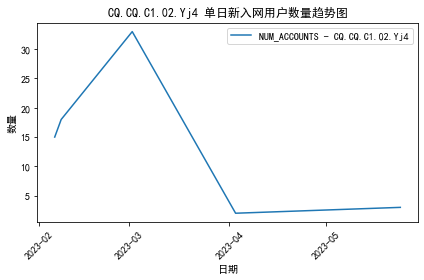

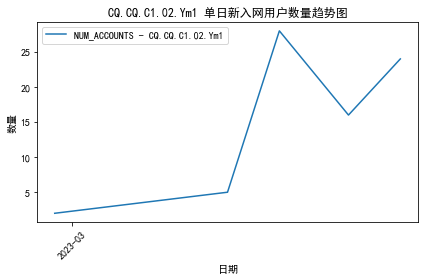

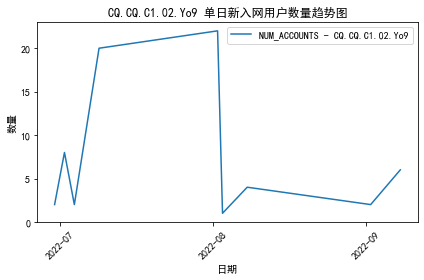

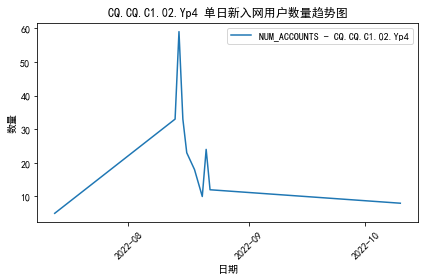

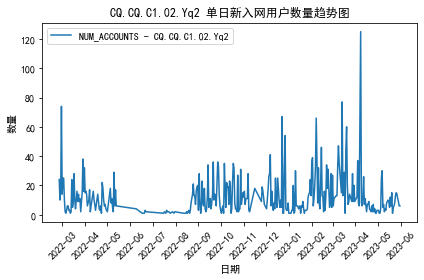

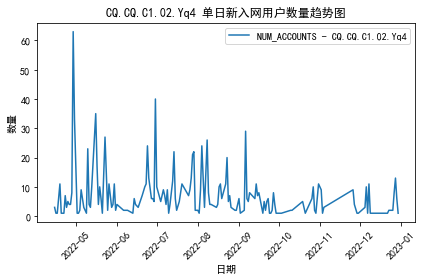

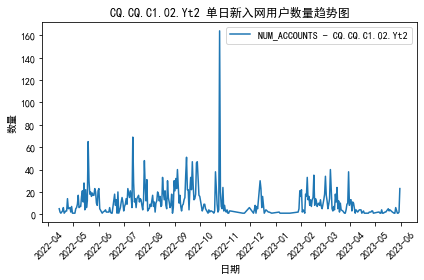

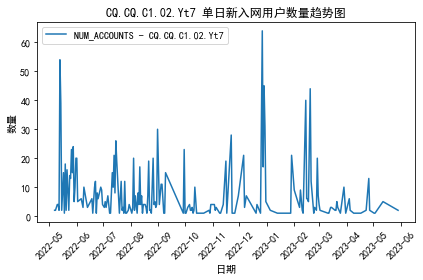

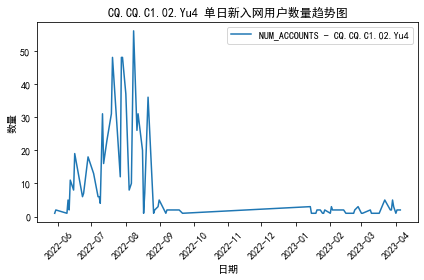

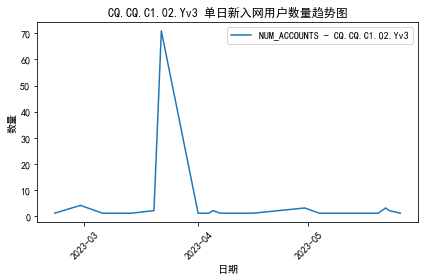

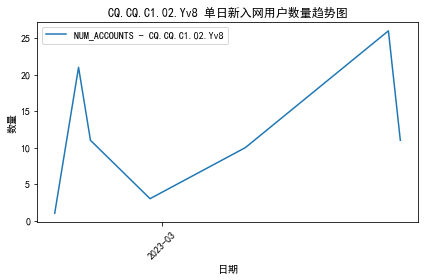

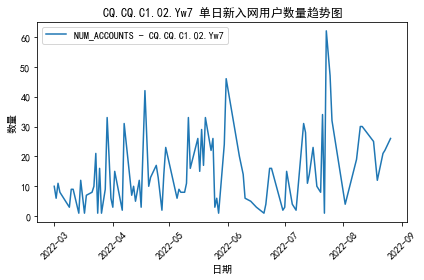

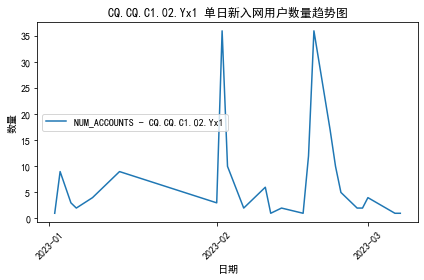

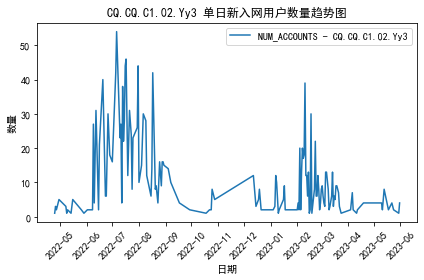

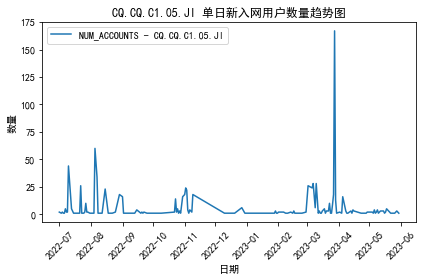

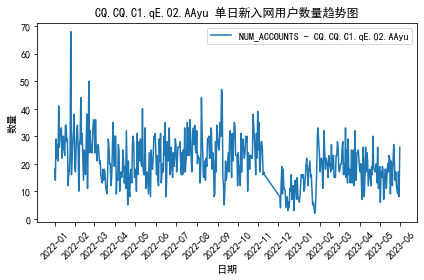

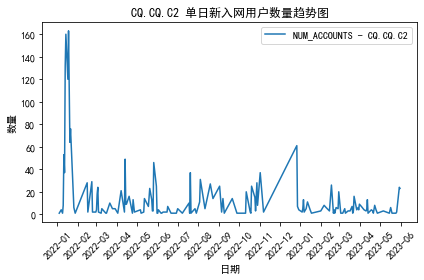

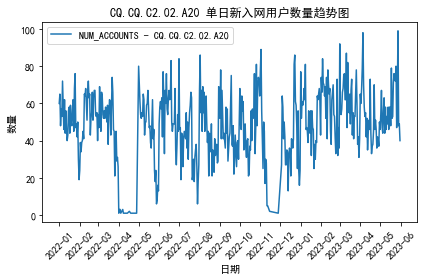

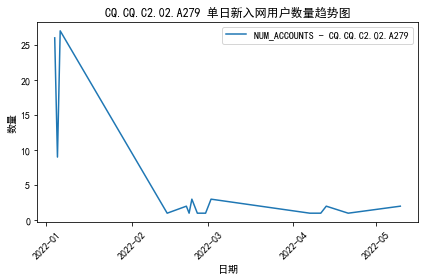

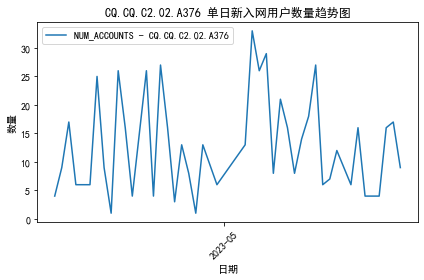

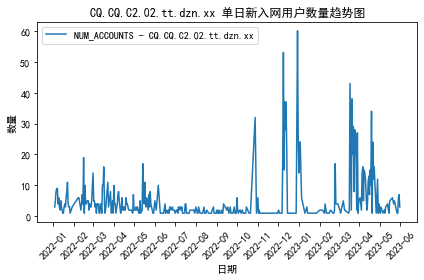

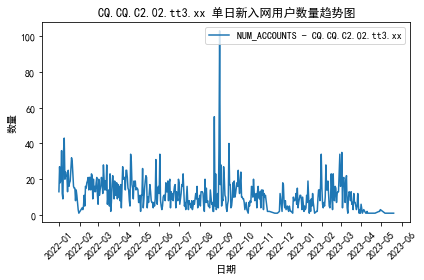

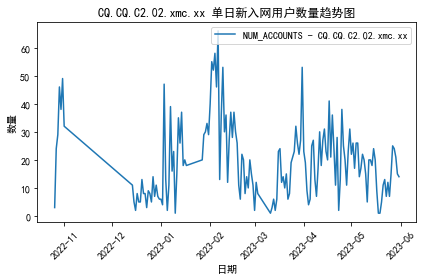

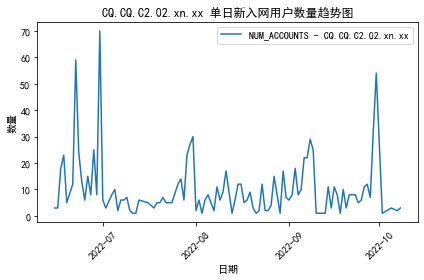

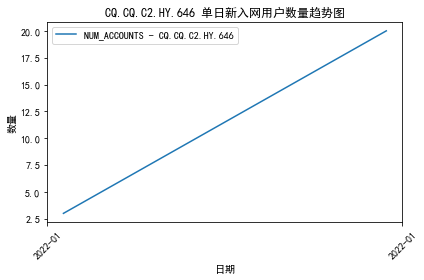

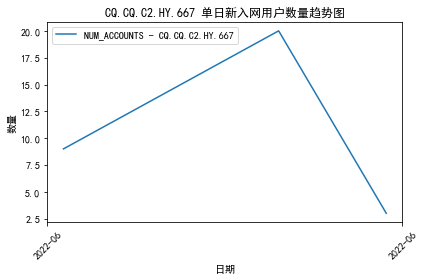

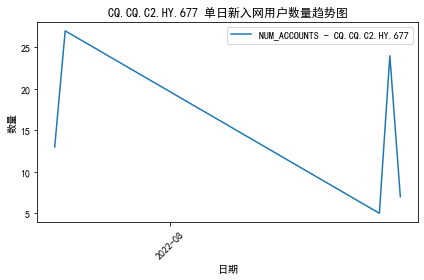

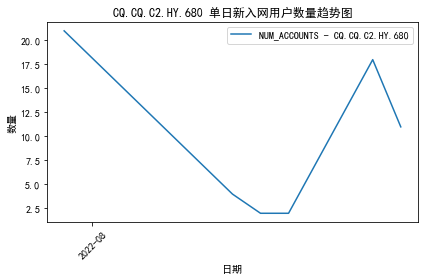

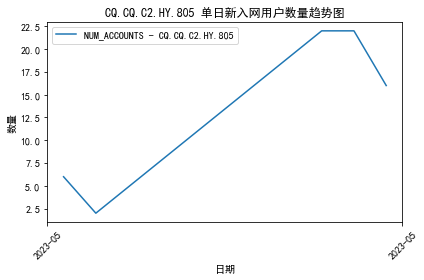

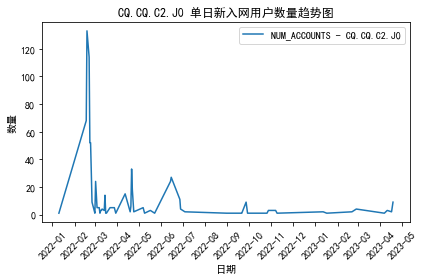

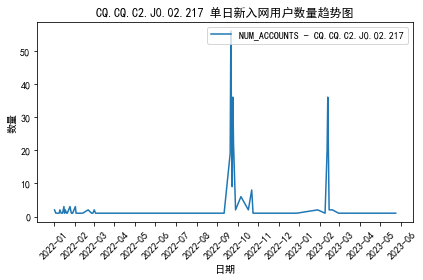

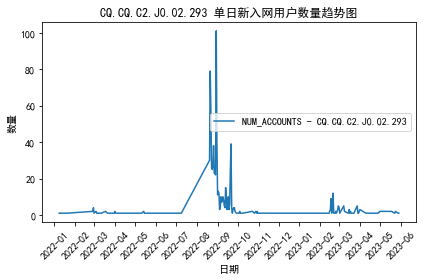

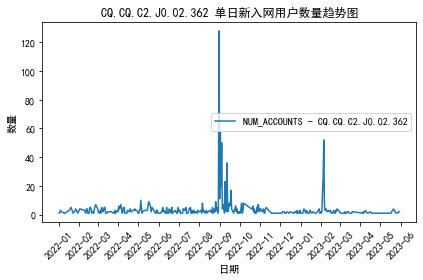

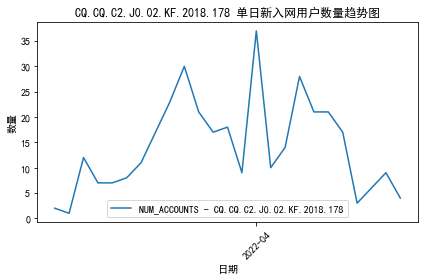

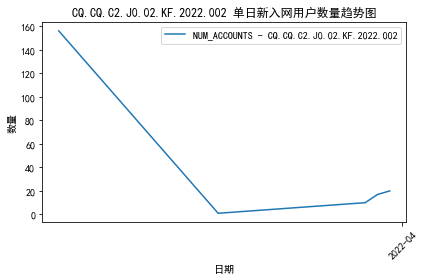

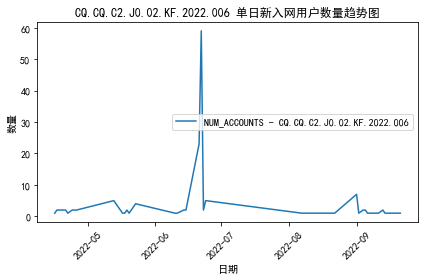

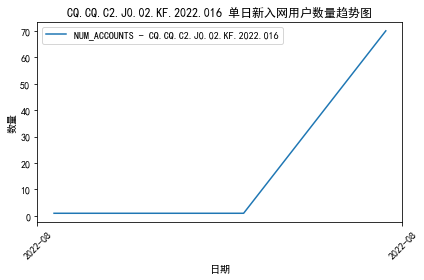

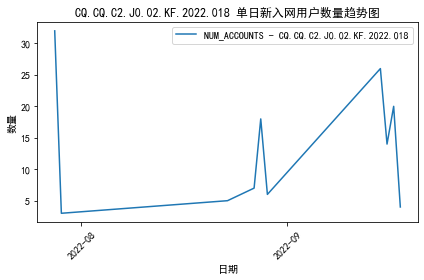

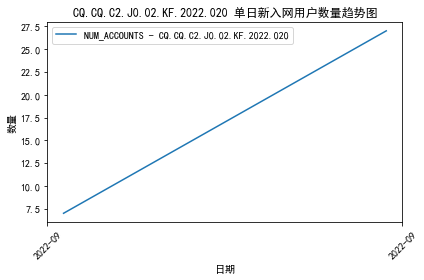

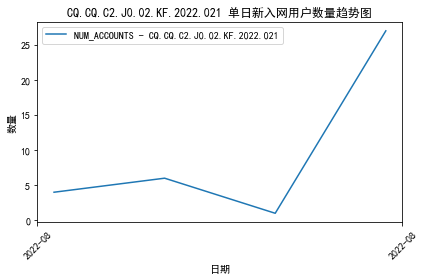

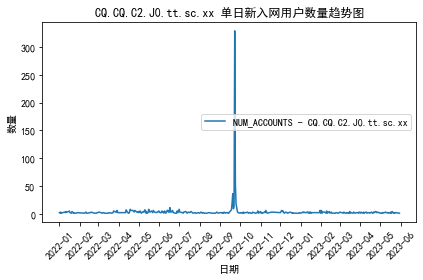

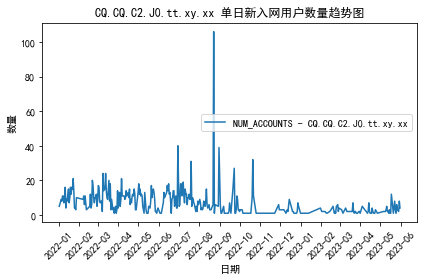

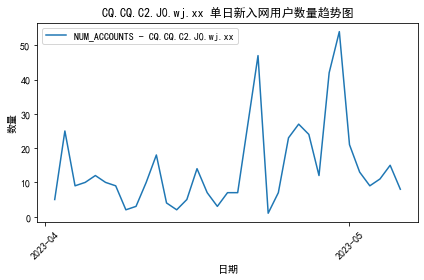

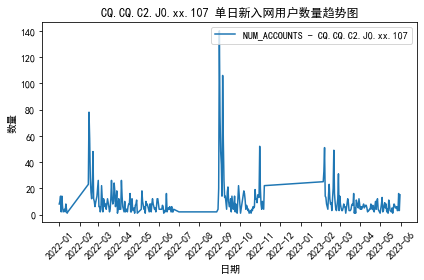

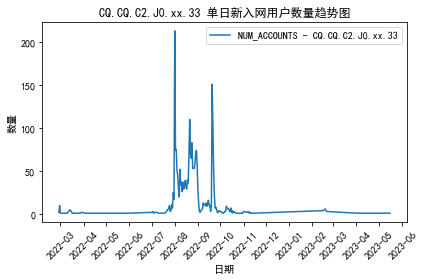

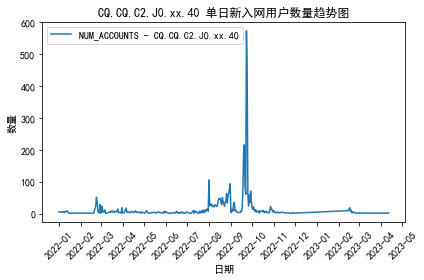

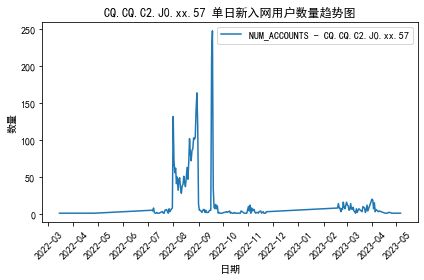

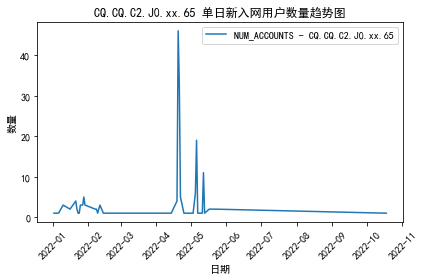

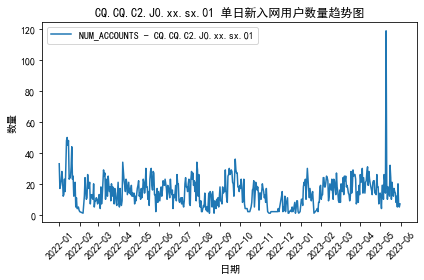

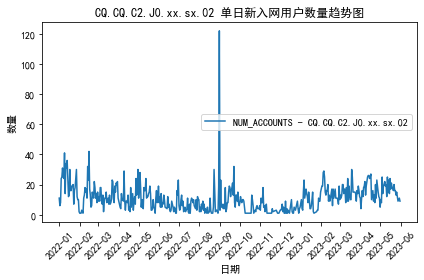

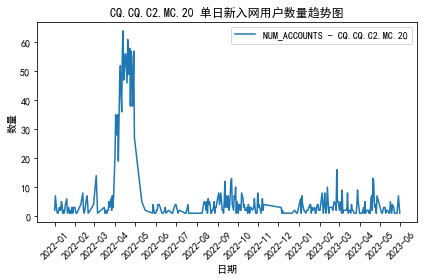

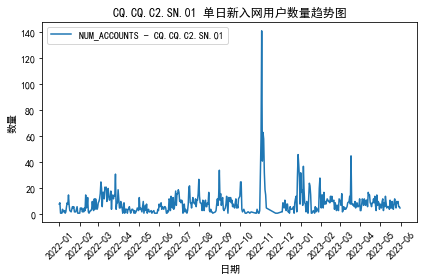

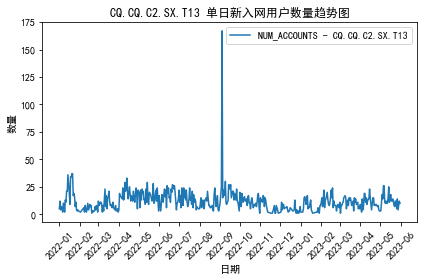

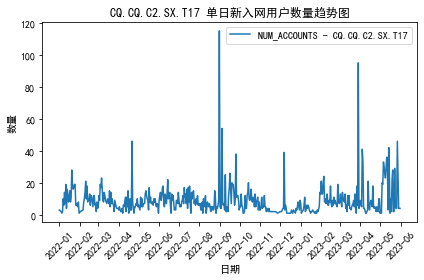

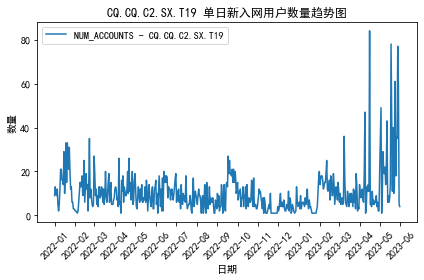

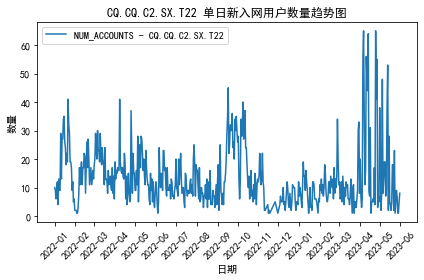

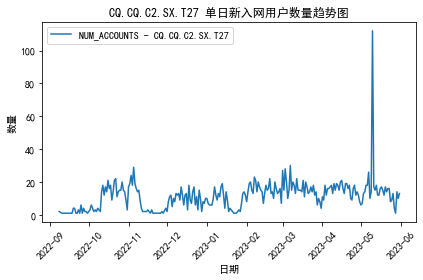

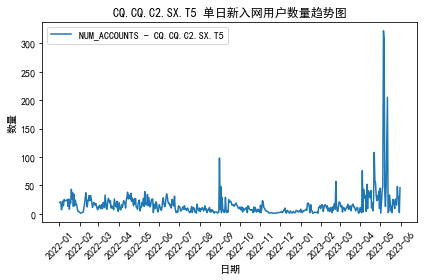

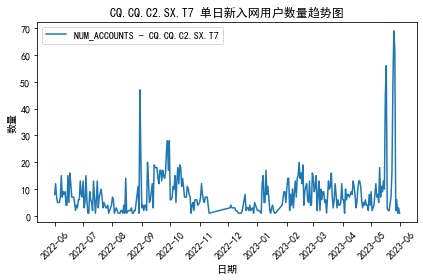

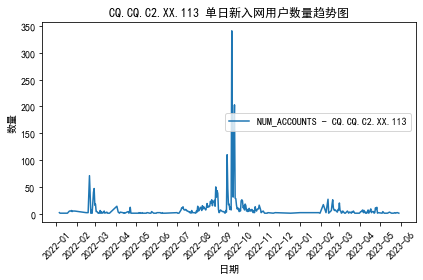

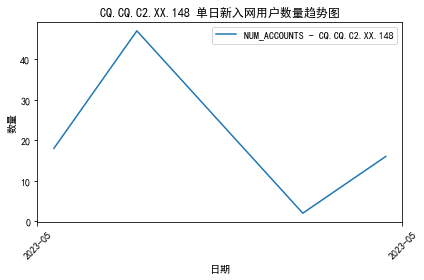

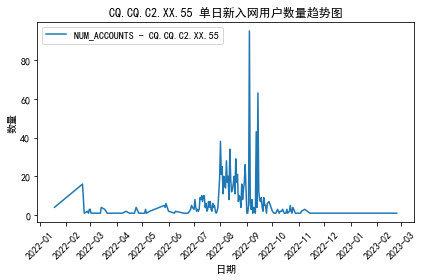

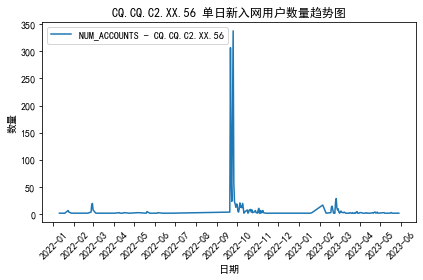

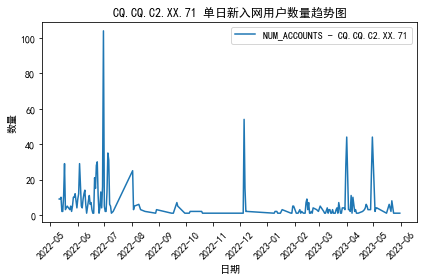

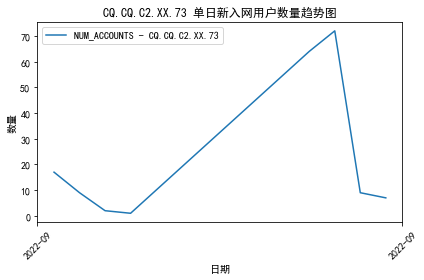

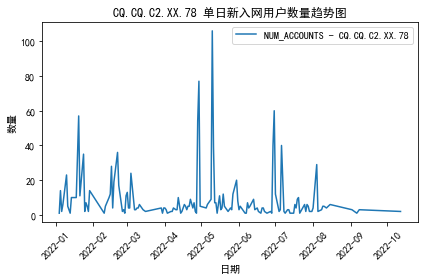

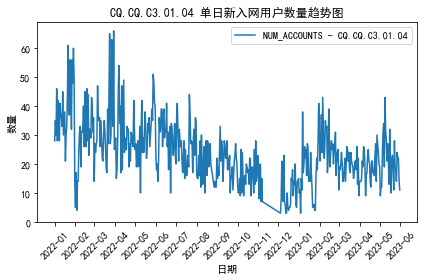

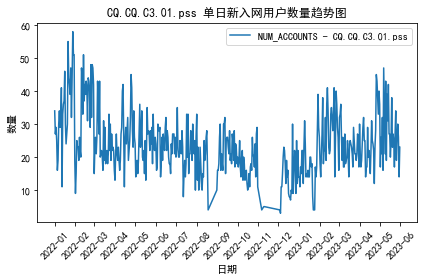

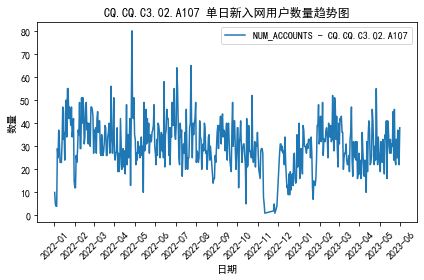

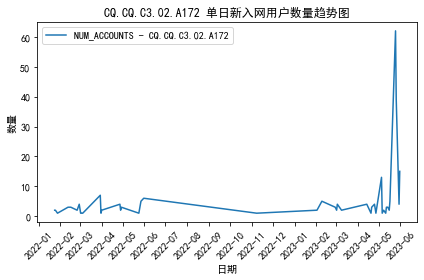

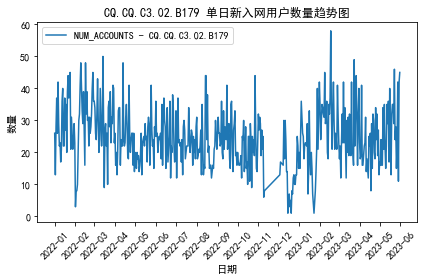

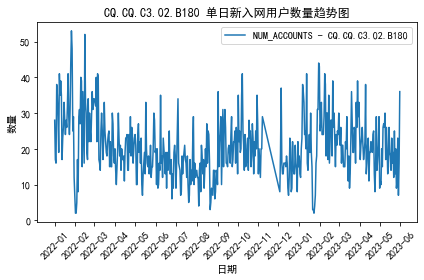

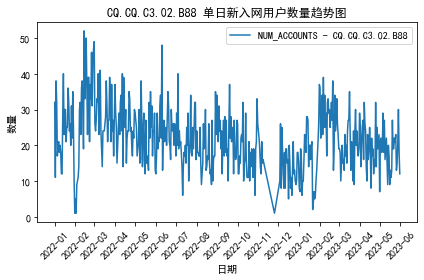

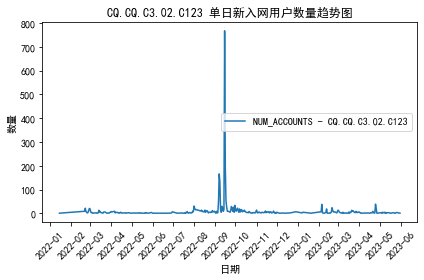

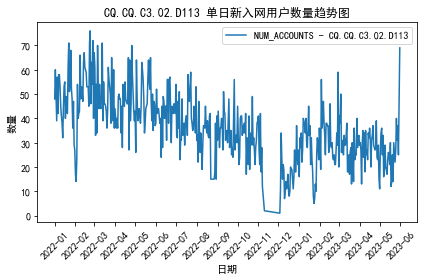

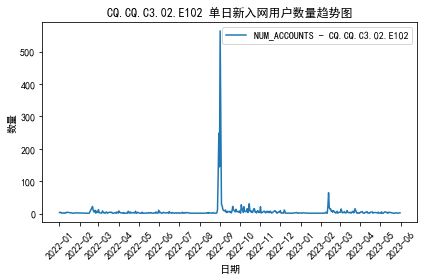

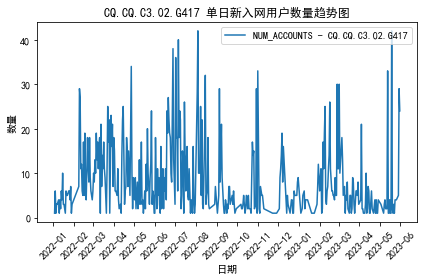

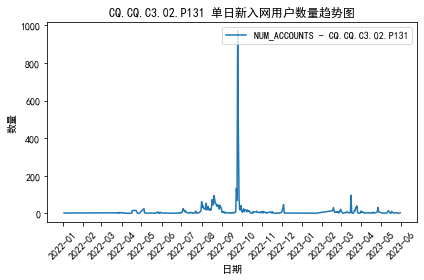

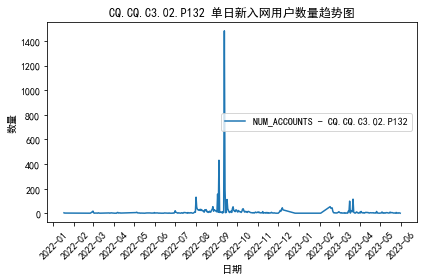

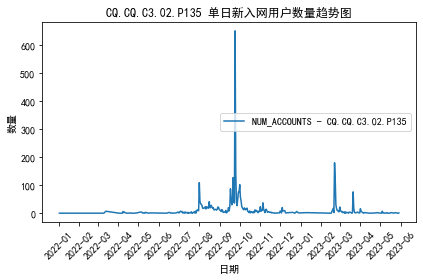

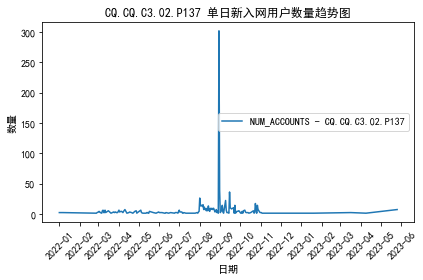

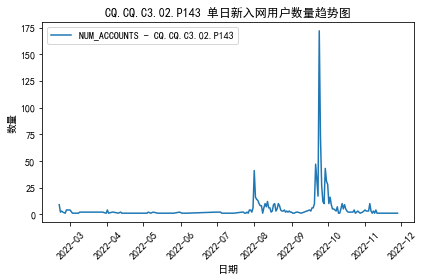

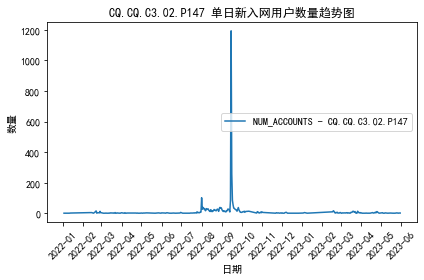

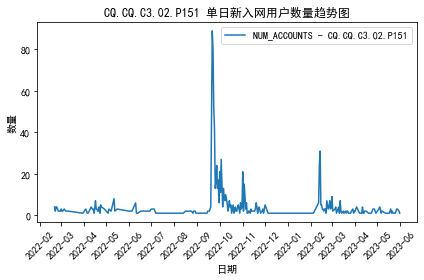

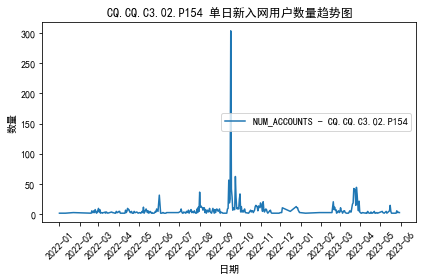

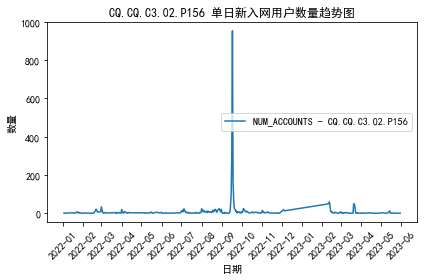

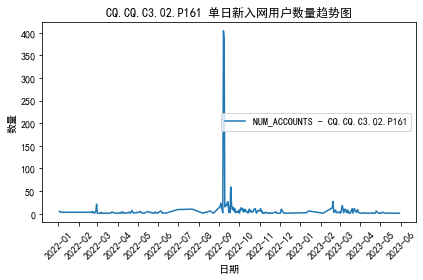

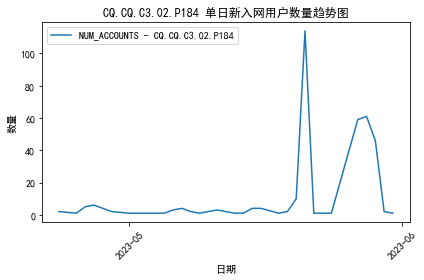

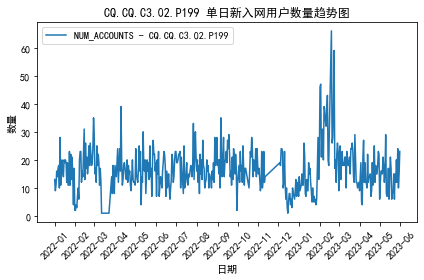

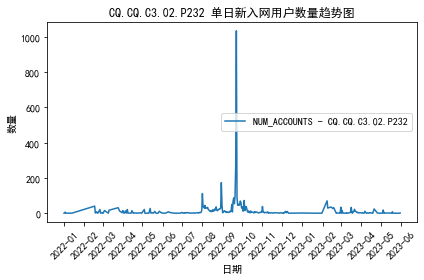

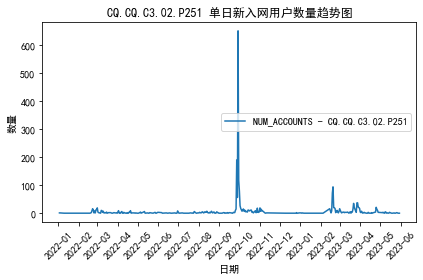

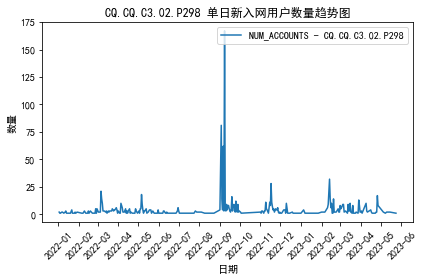

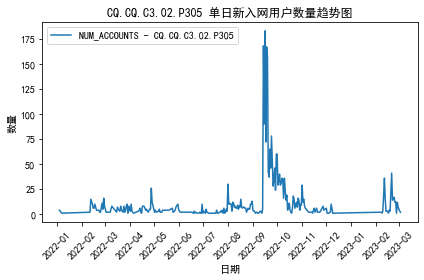

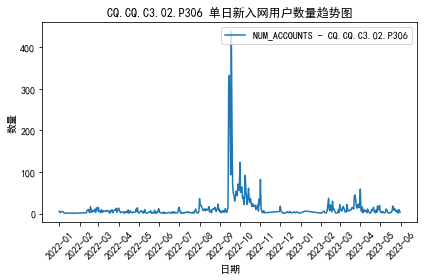

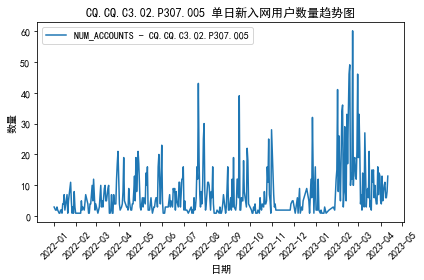

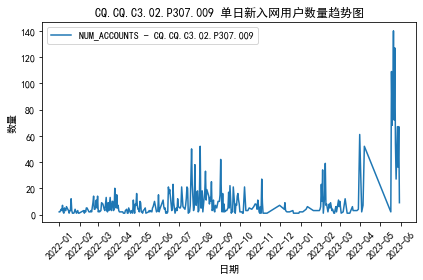

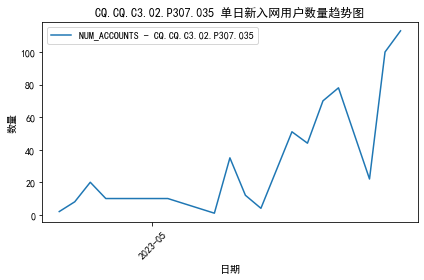

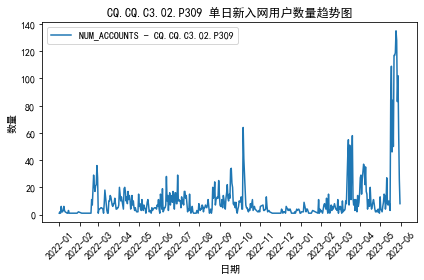

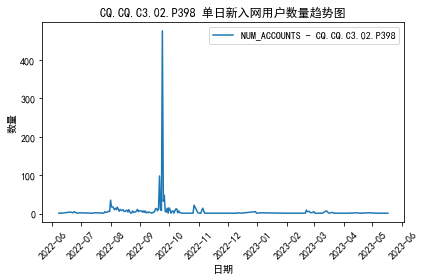

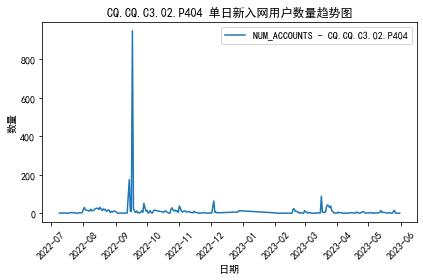

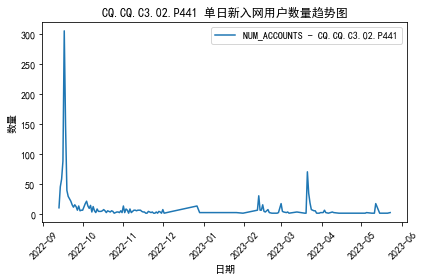

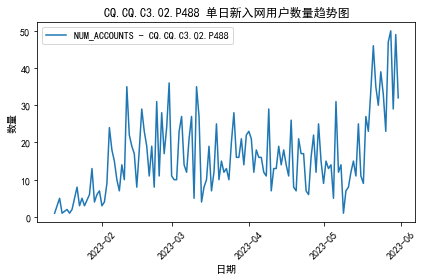

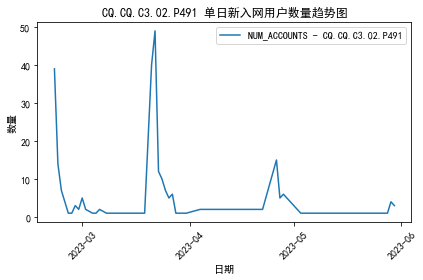

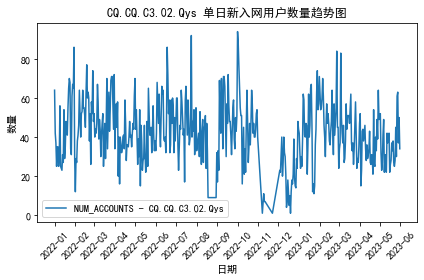

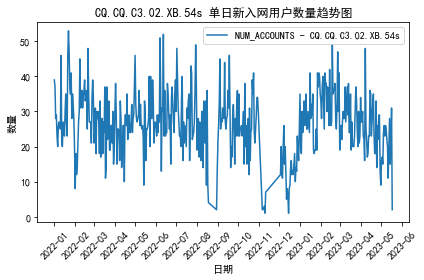

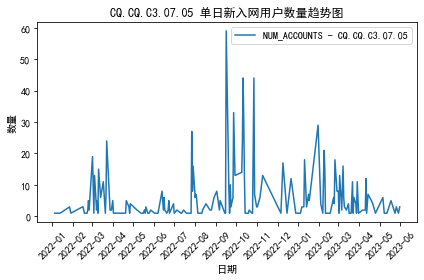

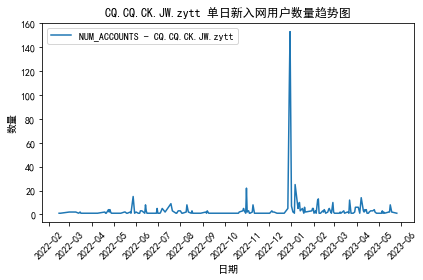

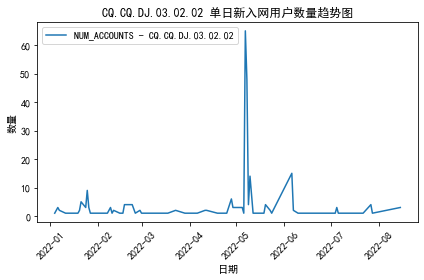

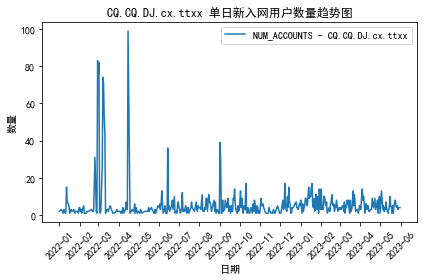

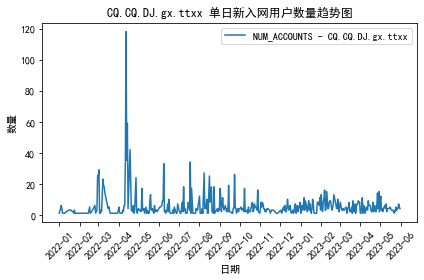

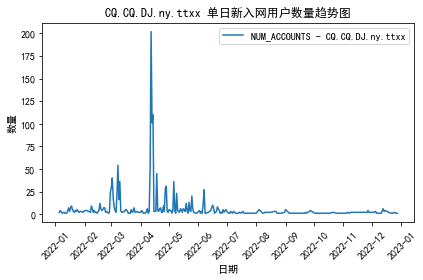

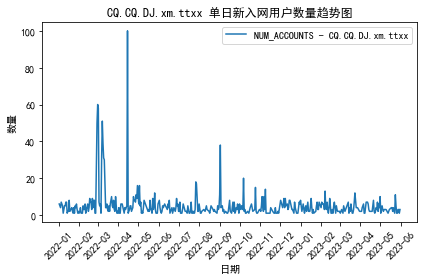

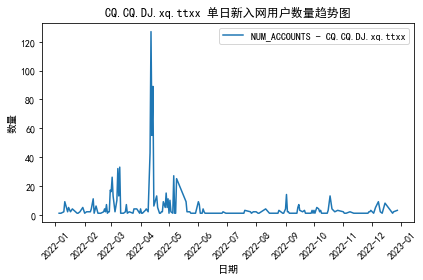

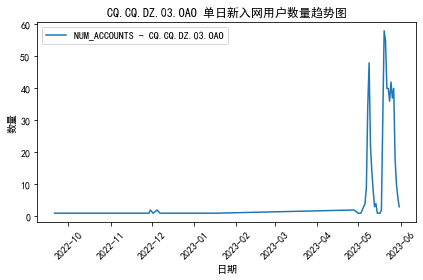

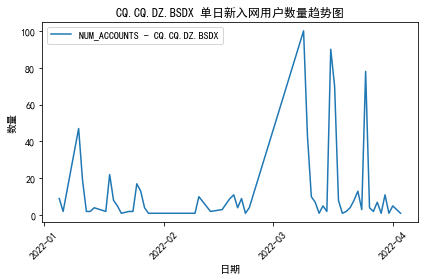

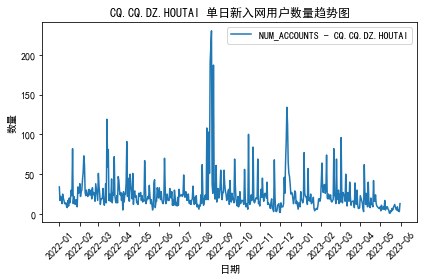

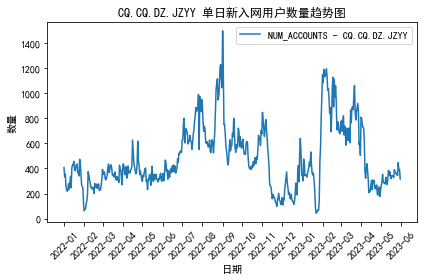

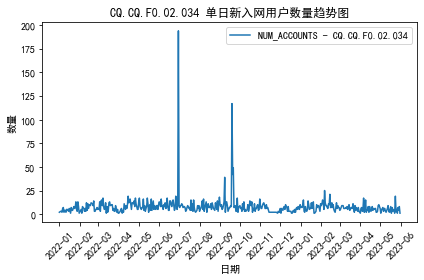

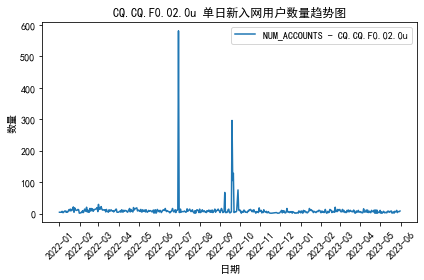

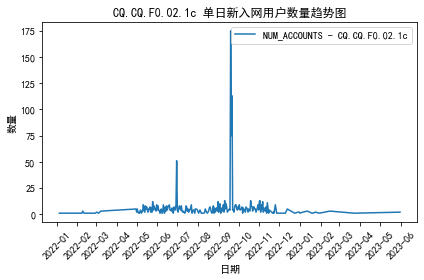

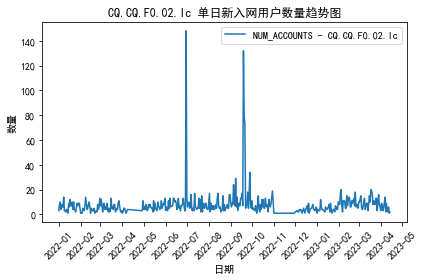

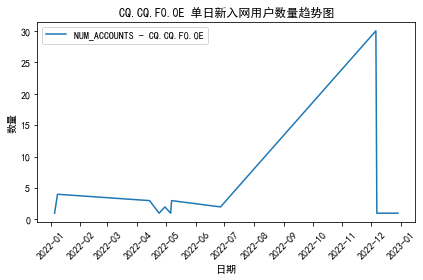

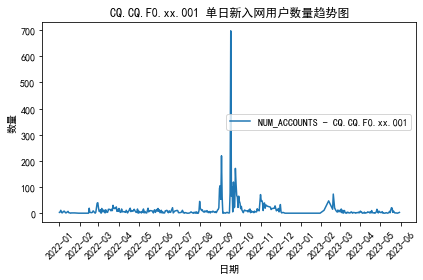

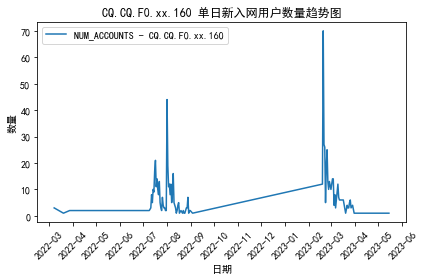

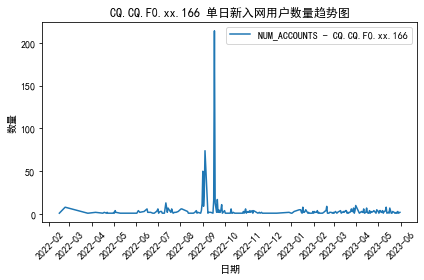

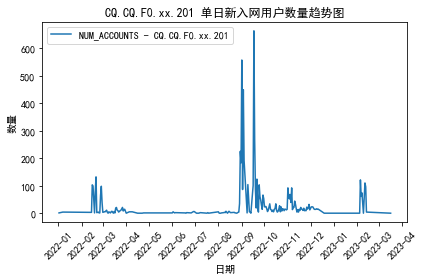

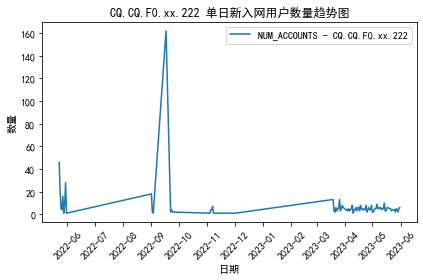

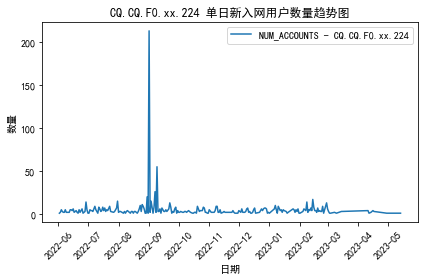

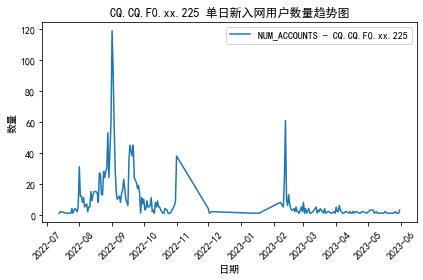

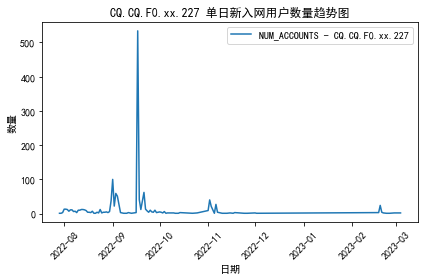

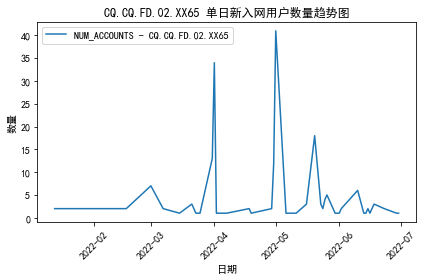

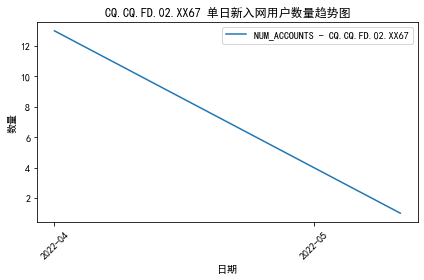

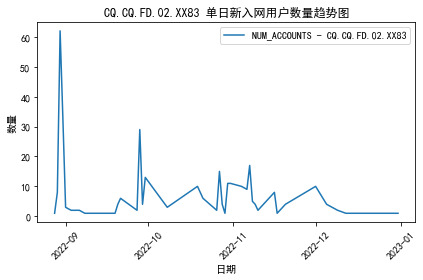

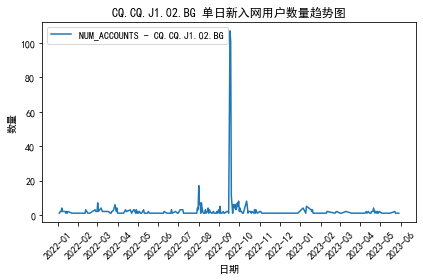

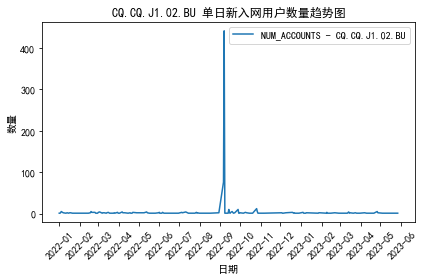

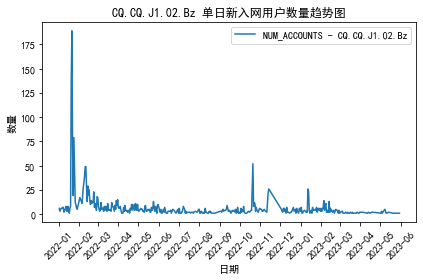

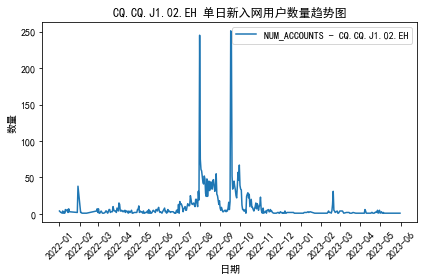

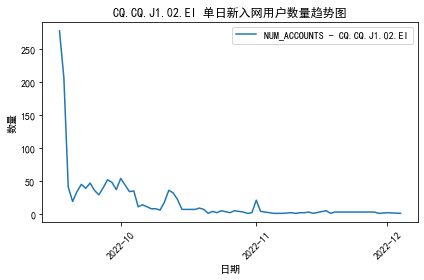

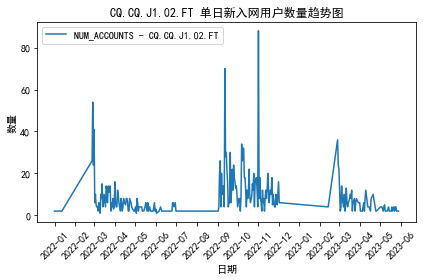

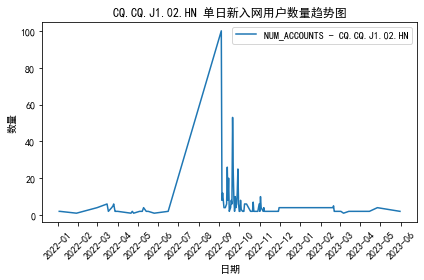

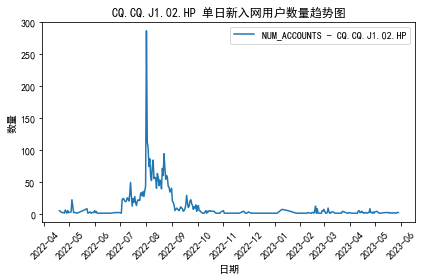

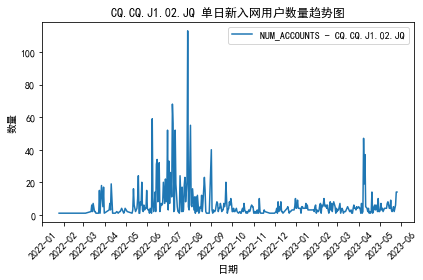

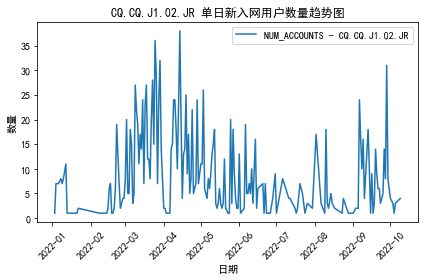

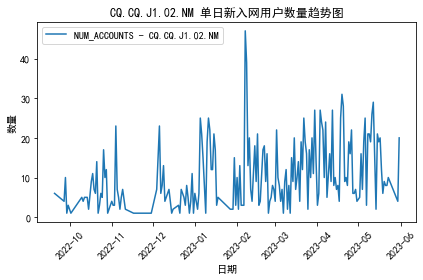

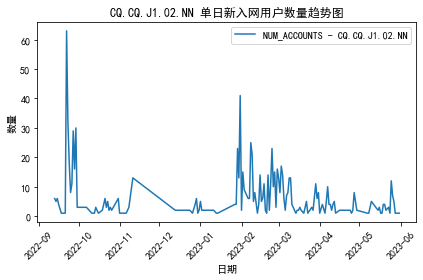

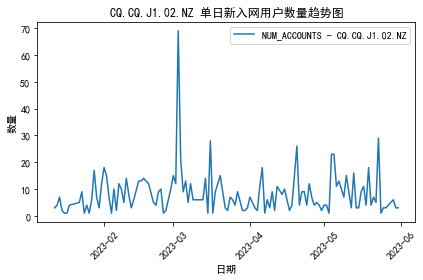

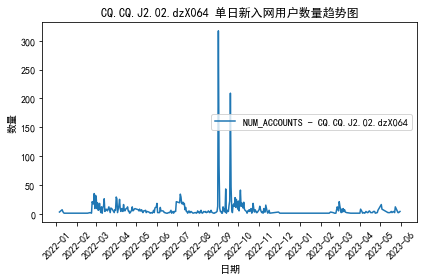

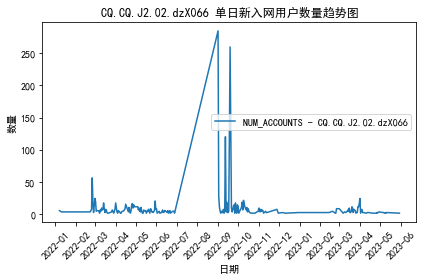

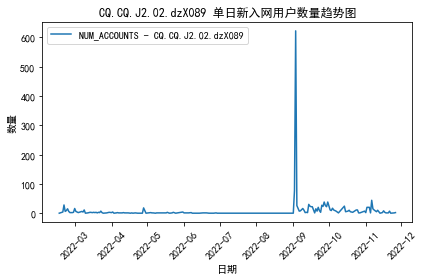

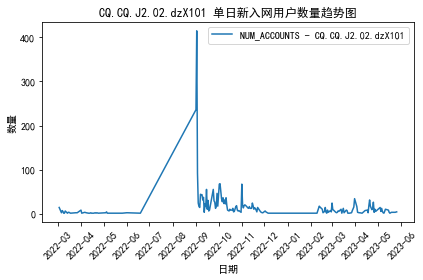

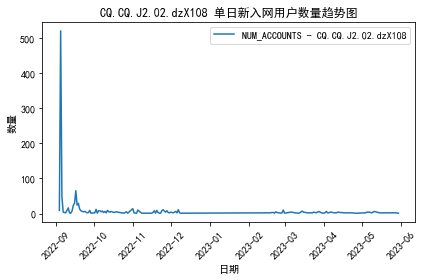

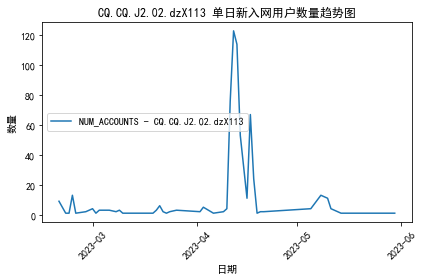

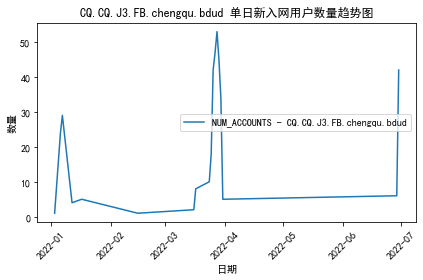

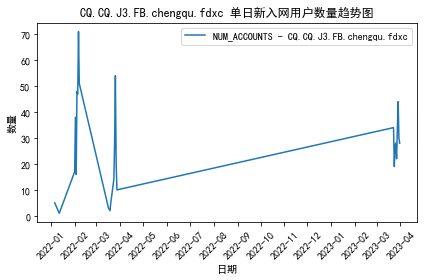

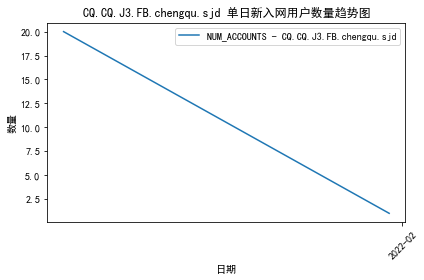

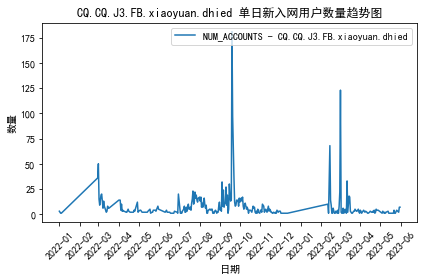

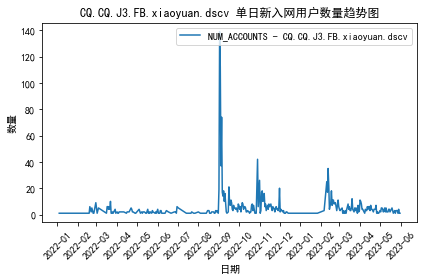

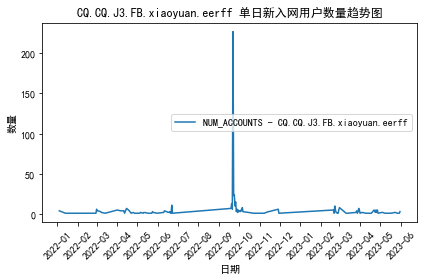

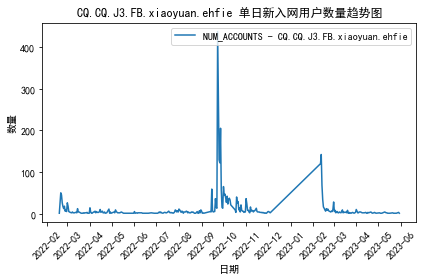

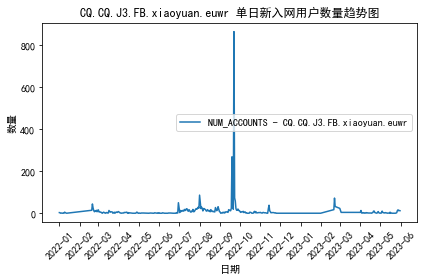

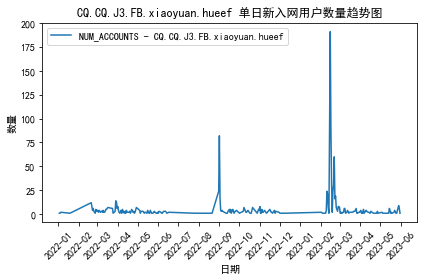

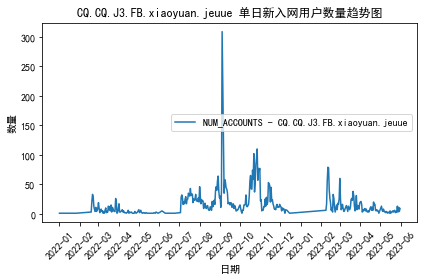

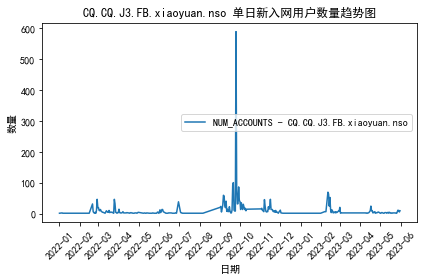

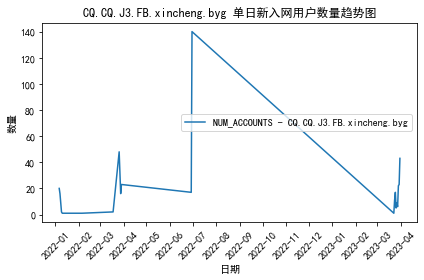

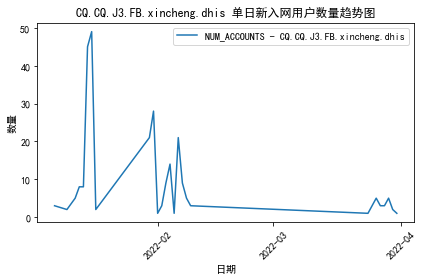

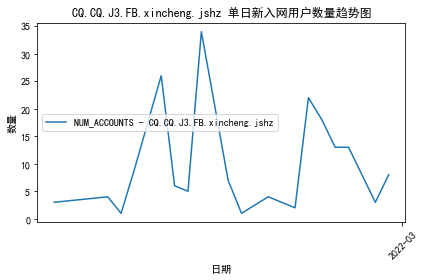

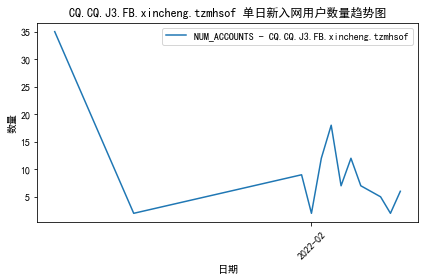

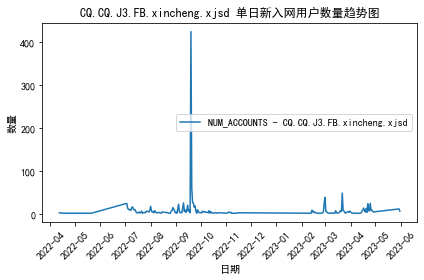

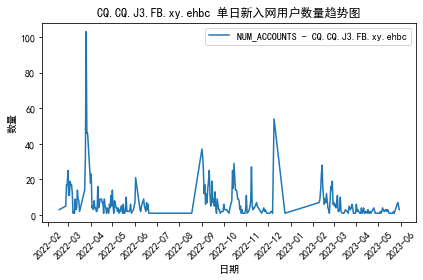

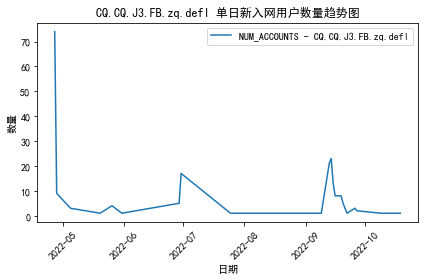

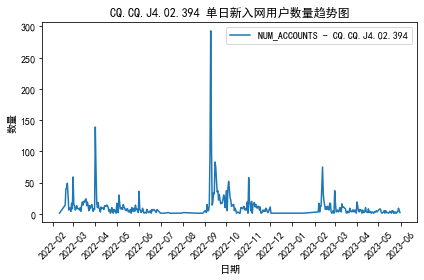

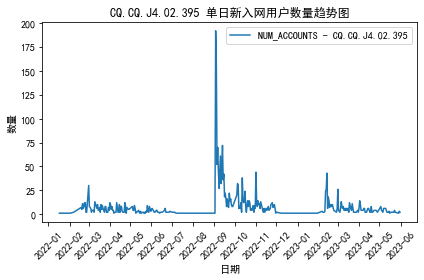

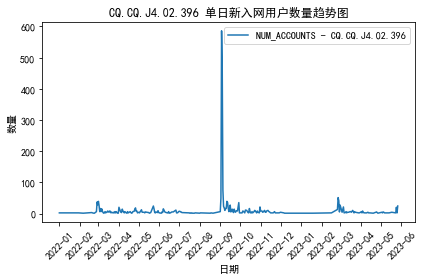

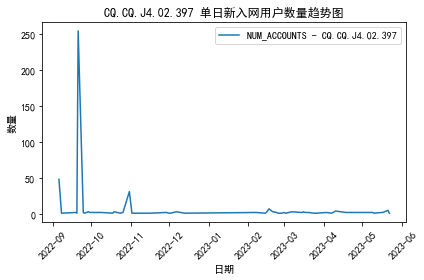

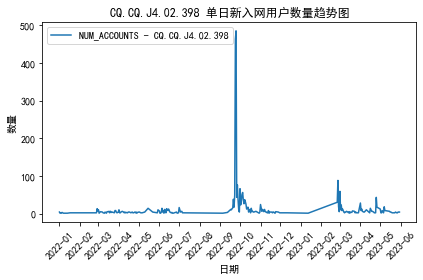

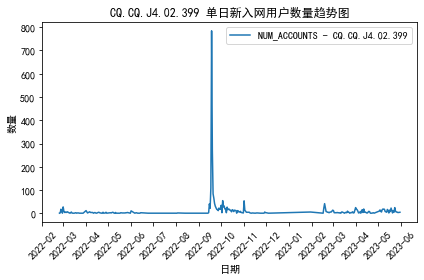

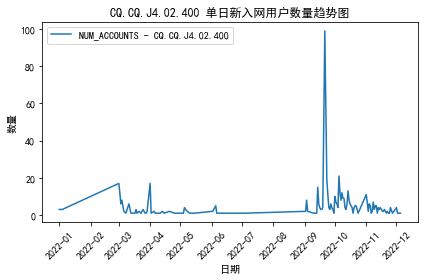

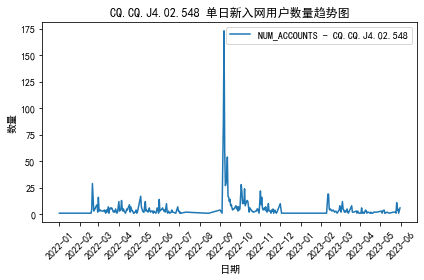

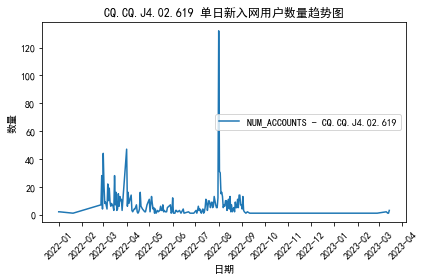

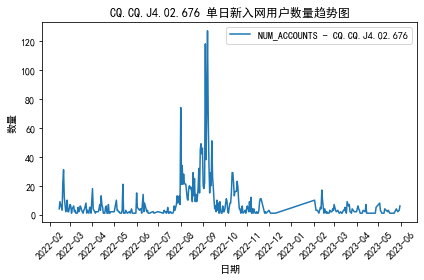

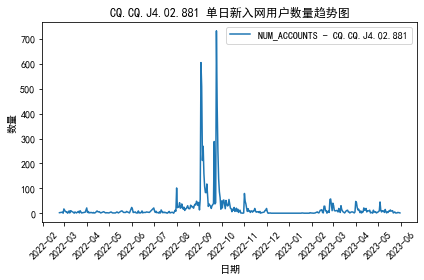

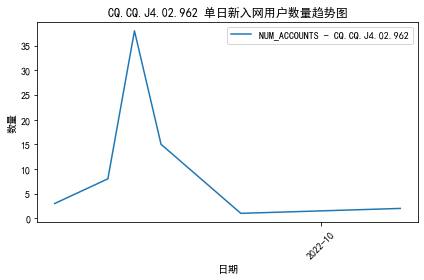

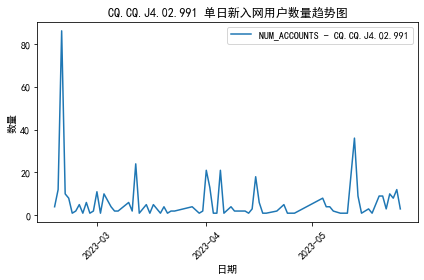

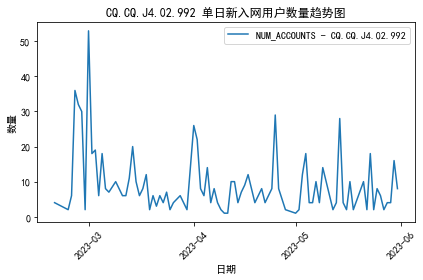

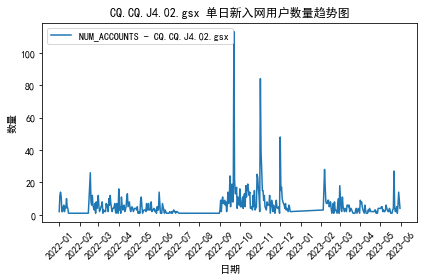

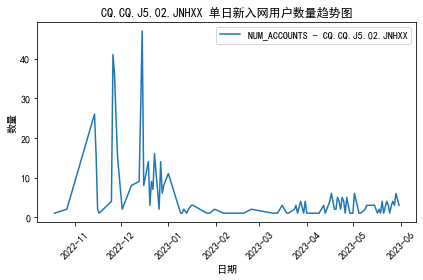

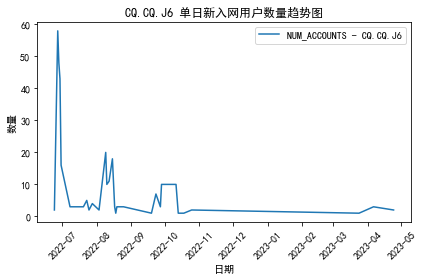

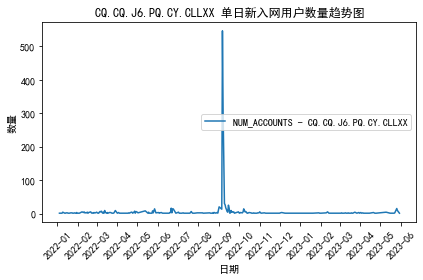

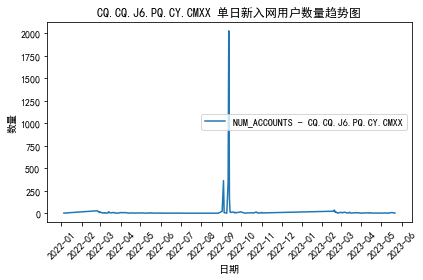

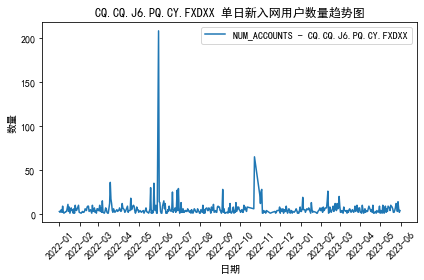

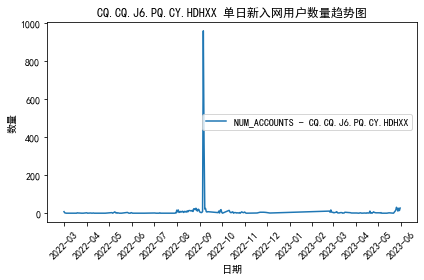

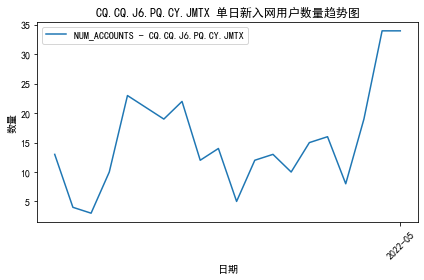

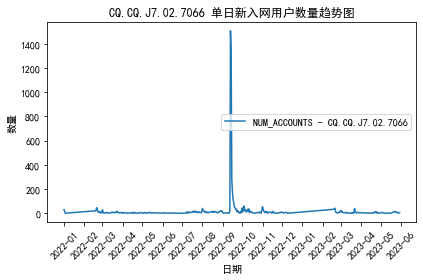

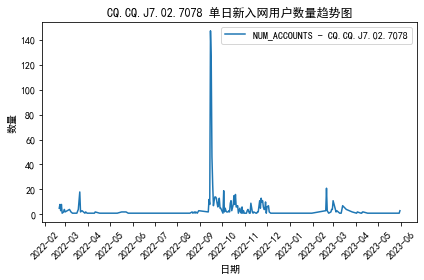

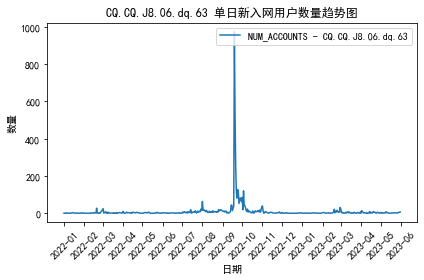

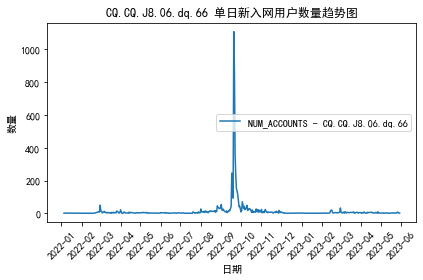

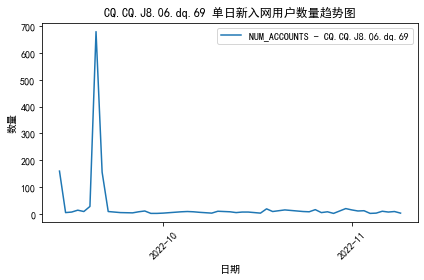

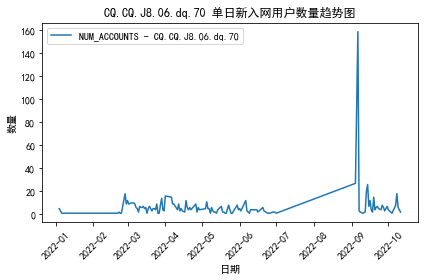

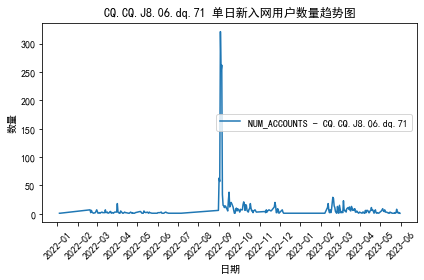

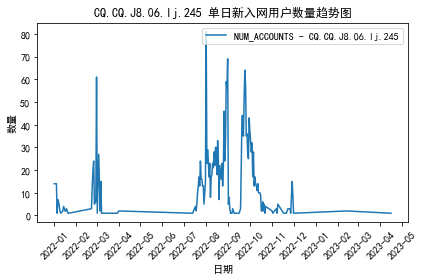

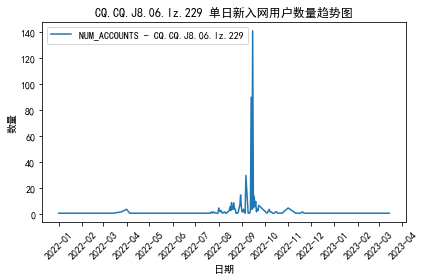

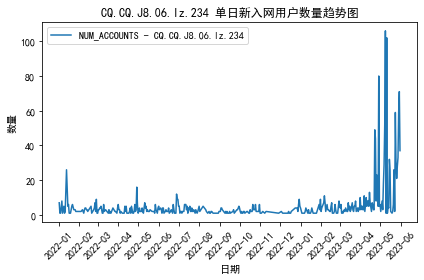

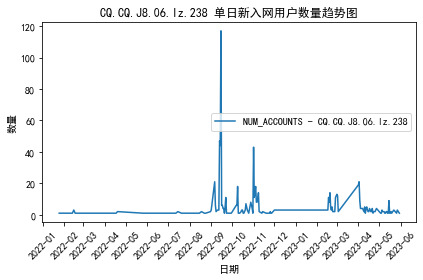

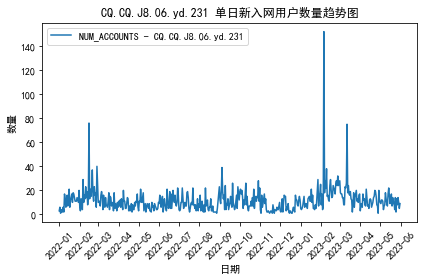

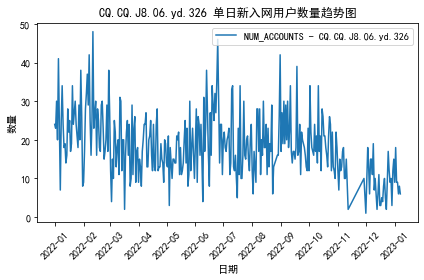

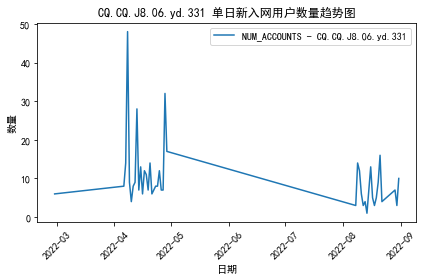

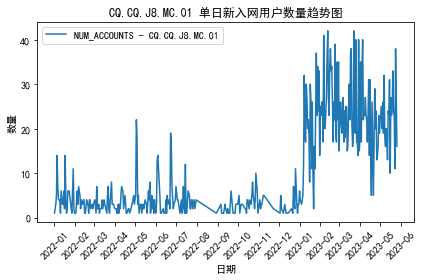

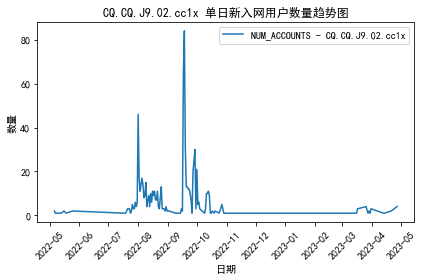

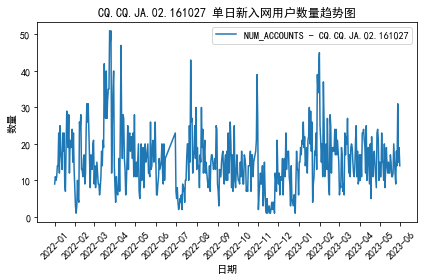

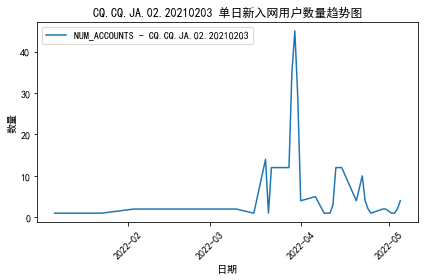

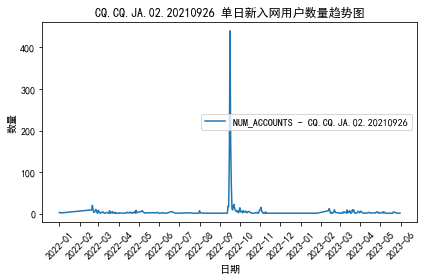

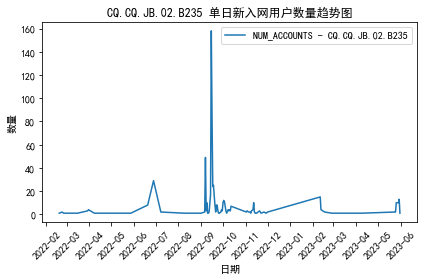

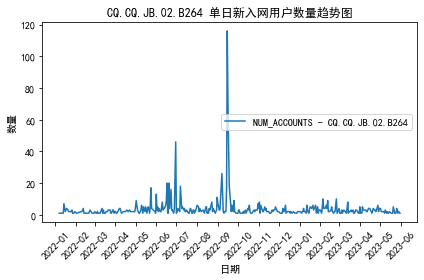

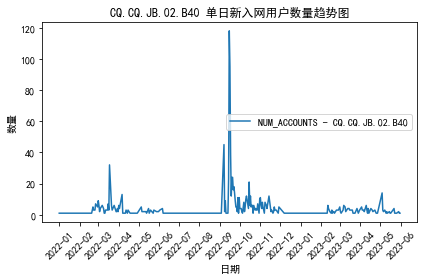

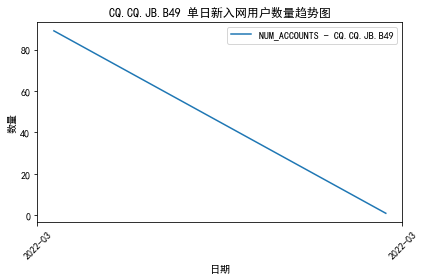

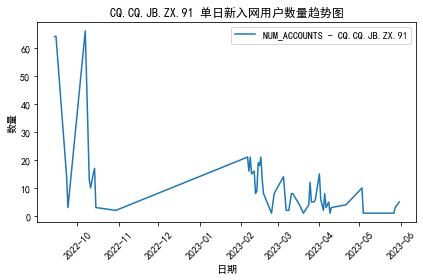

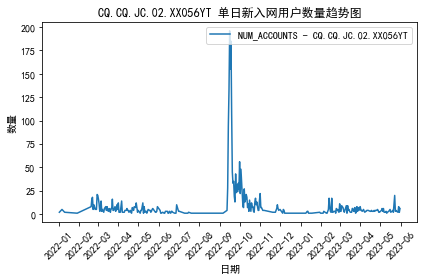

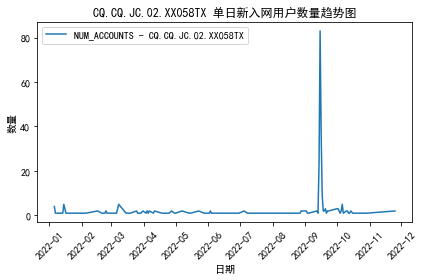

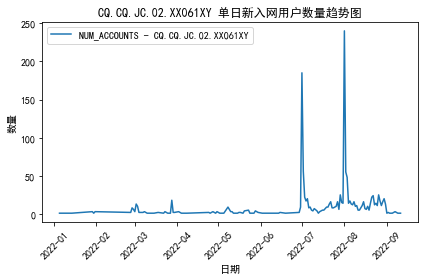

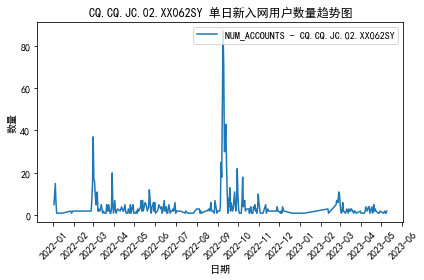

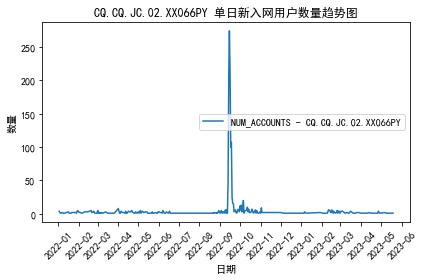

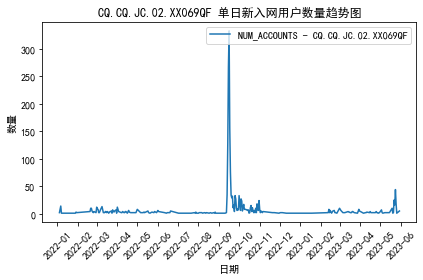

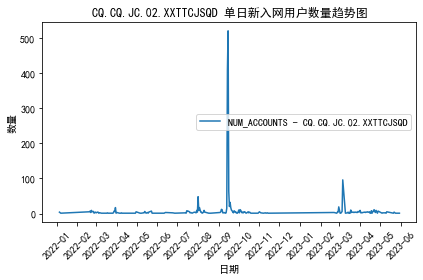

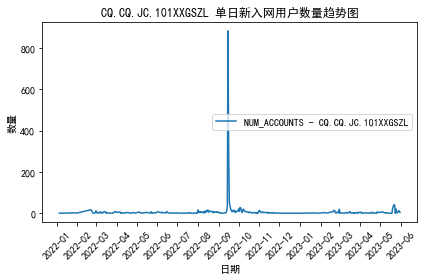

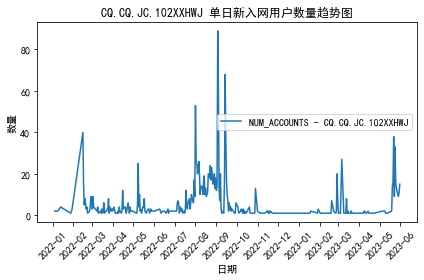

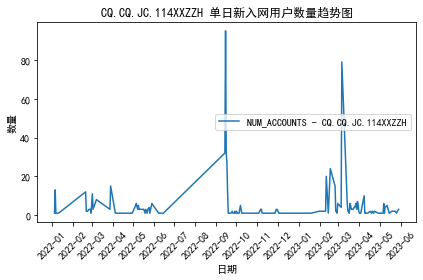

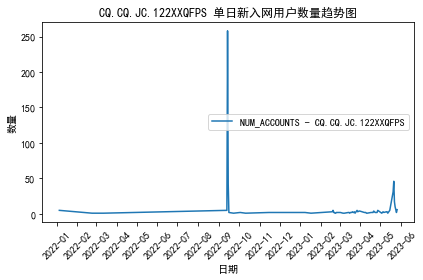

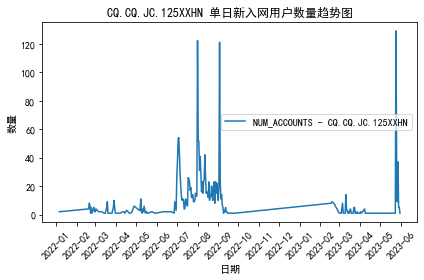

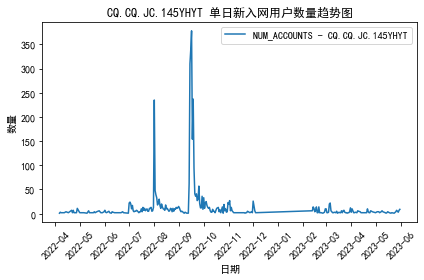

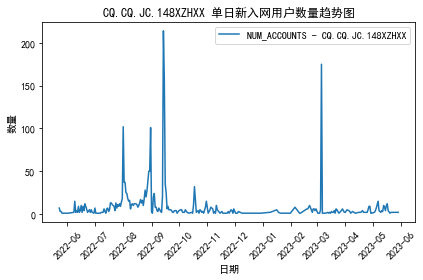

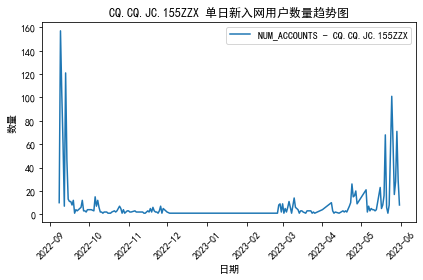

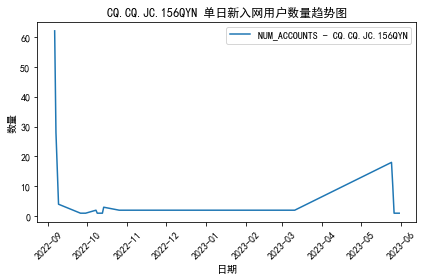

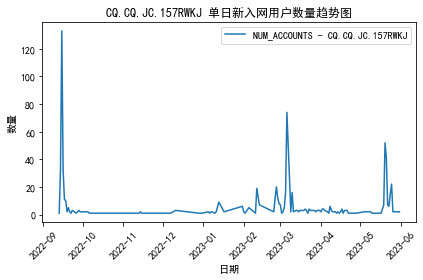

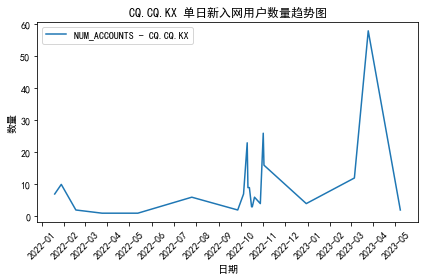

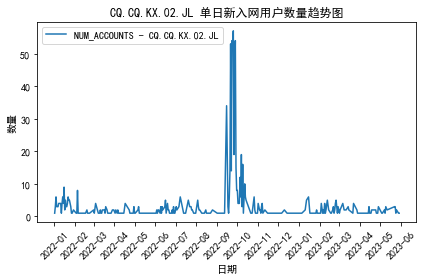

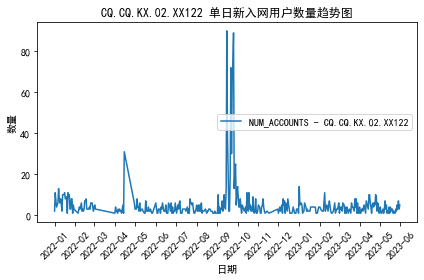

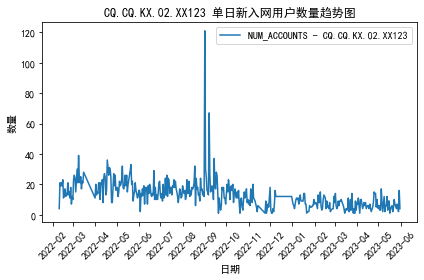

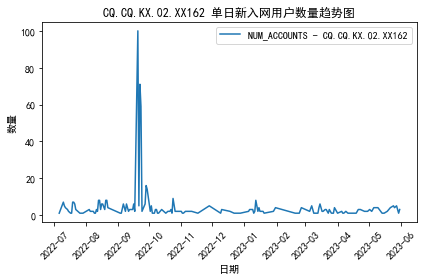

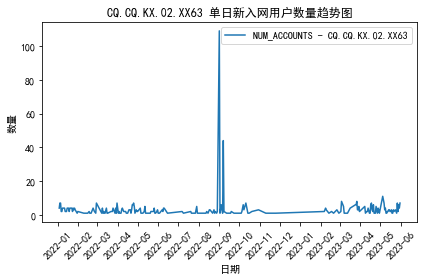

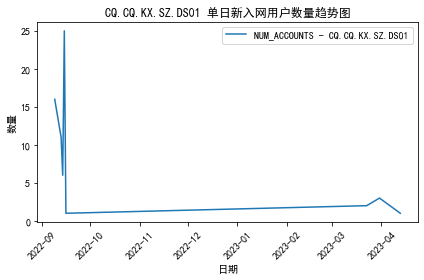

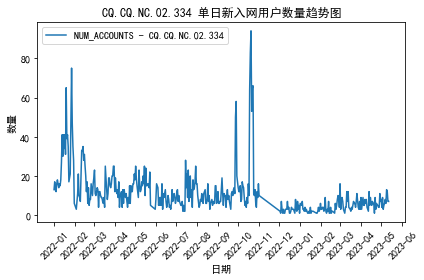

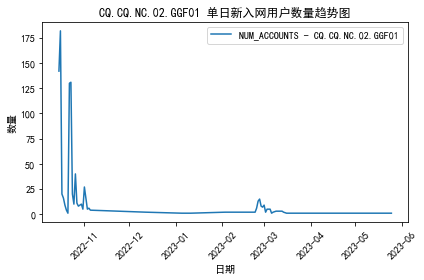

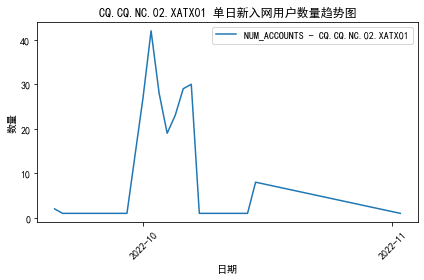

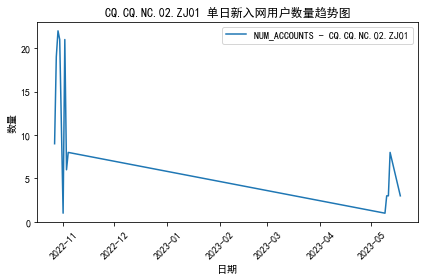

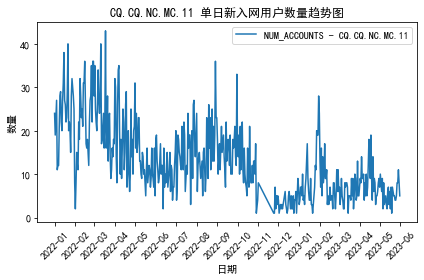

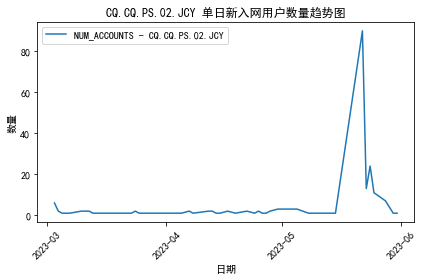

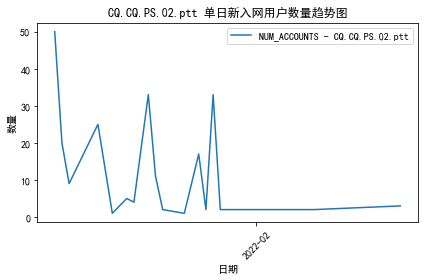

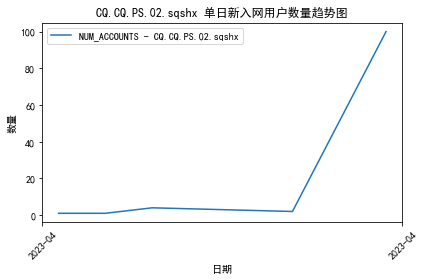

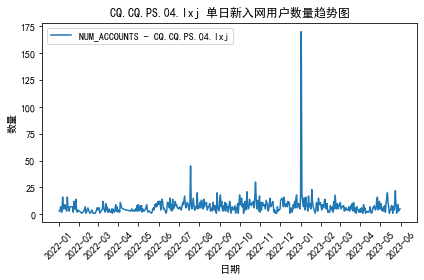

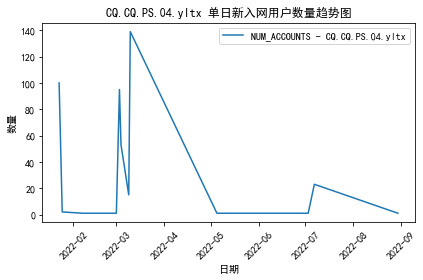

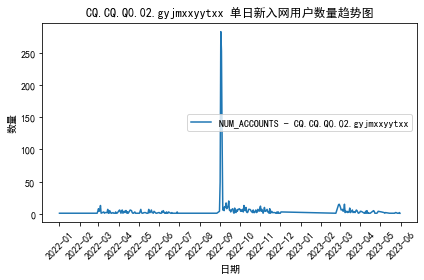

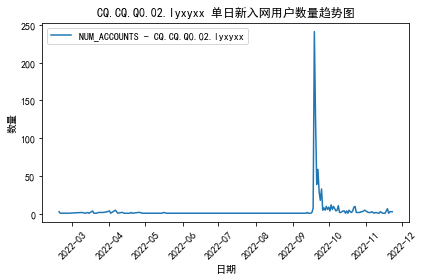

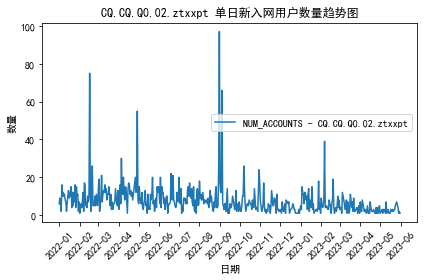

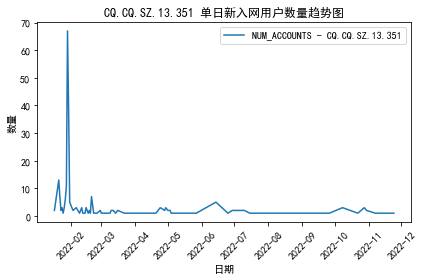

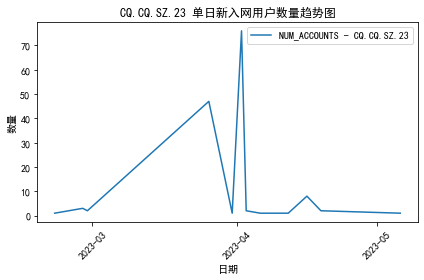

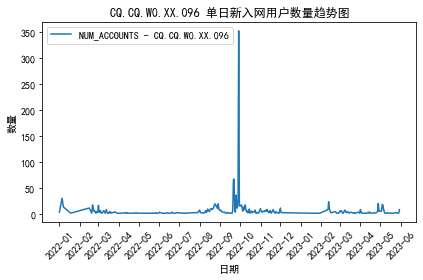

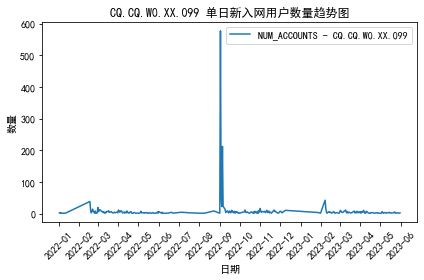

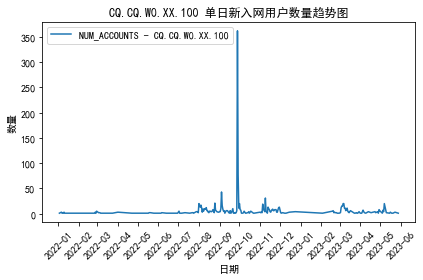

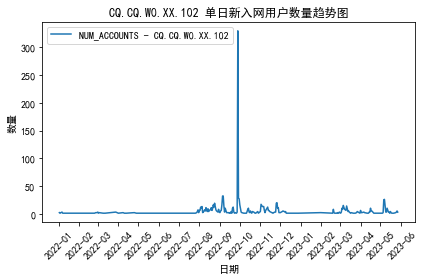

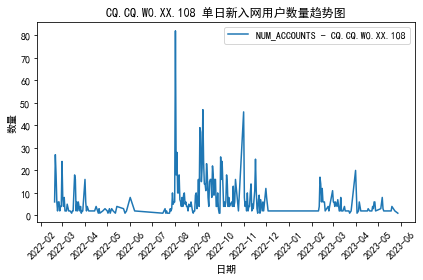

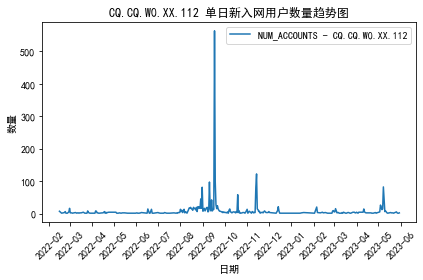

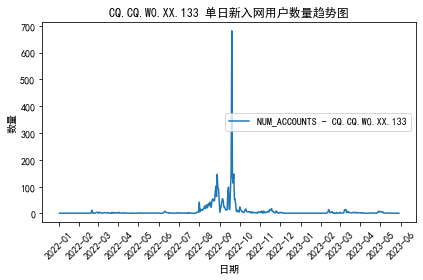

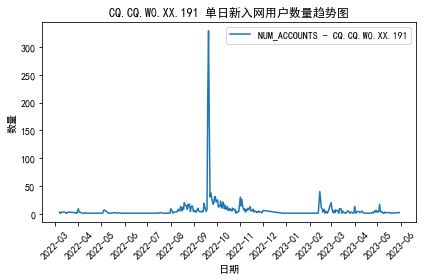

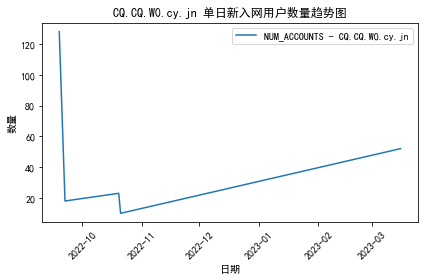

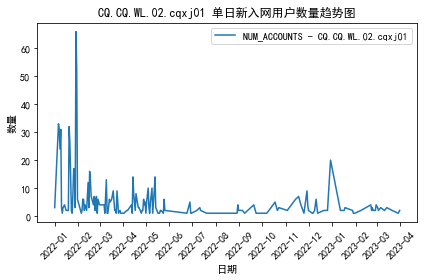

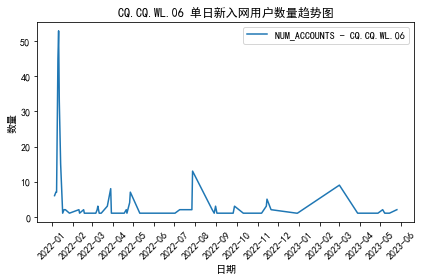

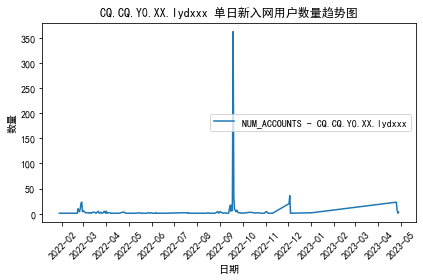

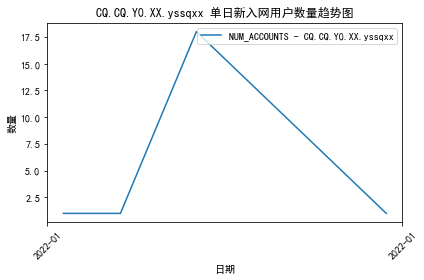

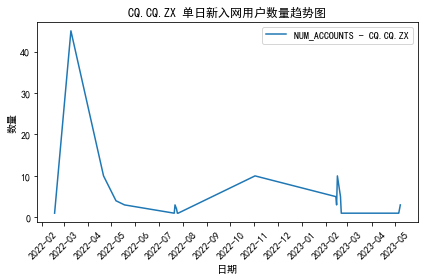

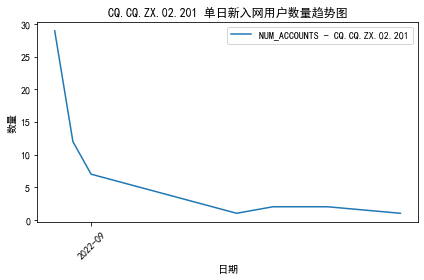

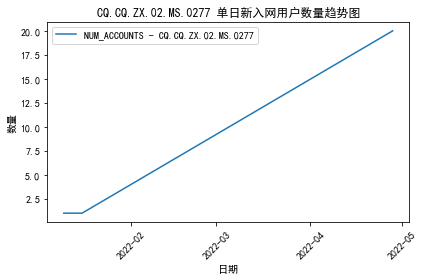

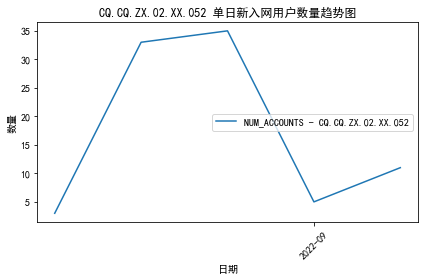

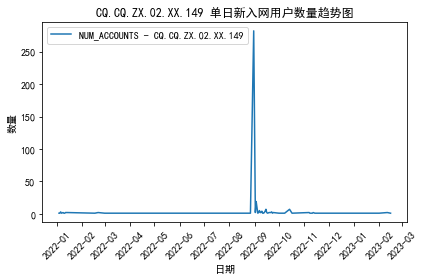

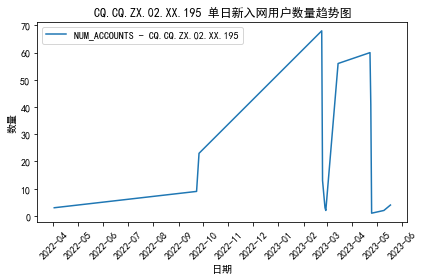

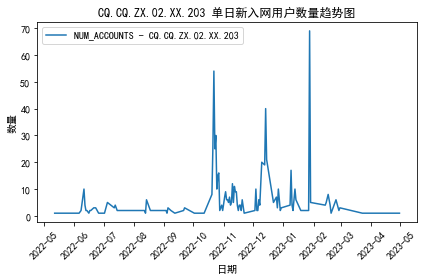

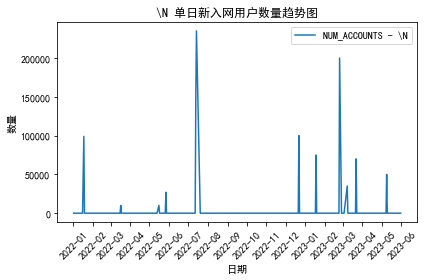

In [8]:
# 绘制折线图
# plt.figure(figsize=(40, 6))
for channel_code, data in grouped_data:
    plt.plot(data['CREATEDATE'], data['NUM_ACCOUNTS'], label=f'NUM_ACCOUNTS - {channel_code}')

    plt.xlabel('日期')
    plt.ylabel('数量')
    plt.title(f'{channel_code} 单日新入网用户数量趋势图')
    plt.legend()
    # 设置横轴刻度为一周
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    # 保存图表到指定路径下的图片文件
    plt.savefig(f'./21 各渠道单日新入网用户数量趋势图/{channel_code}.jpg', dpi=300)
    # plt.show()一定要用在最后，因为它会将画布刷新
    plt.show()

## 分析各渠道开户月内即注销的数据

In [9]:
df1 = pd.read_csv('21 各渠道开户月内即注销数据.csv',encoding='gbk')

In [13]:
# 使用strip()函数去除所有单元格前后的空格
df1 = df1.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125086 entries, 0 to 125085
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0                 125086 non-null  int64 
 1   USER_ID       125086 non-null  int64 
 2   PRODUCT_NO    125086 non-null  int64 
 3   REGION_NAME   125086 non-null  object
 4   CREATEDATE    125086 non-null  object
 5   CHANNEL_NAME  125086 non-null  object
 6   CHANNEL_CODE  125086 non-null  object
 7   OPER_CODE     125086 non-null  object
 8   CHANNEL_TYPE  125086 non-null  object
 9   XH_DATE       125086 non-null  object
 10  USERSTATUS    125086 non-null  object
 11  PLAN_NAME     125086 non-null  object
 12  QF            125086 non-null  object
dtypes: int64(3), object(10)
memory usage: 12.4+ MB


In [38]:
less_month_count = df1.groupby(['CHANNEL_CODE','CHANNEL_NAME']).agg({'USERSTATUS': 'count'})

In [39]:
less_month_count.columns = ['LESS_MONTH_COUNT']

In [40]:
less_month_count = less_month_count.sort_values('LESS_MONTH_COUNT', ascending=False)

In [42]:
less_month_count.to_csv('./21 各渠道新入网用户月内即注销统计.csv',encoding='gbk')